In [1]:
import pandas as pd

In [ ]:

f = pd.read_excel('/Users/evelynzhang/Downloads/GuttmacherInstituteAbortionDataByState.xlsx', engine='openpyxl')
abortion =f

In [259]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

🟠 Proposition 1: “Teen abortion rates are highest in states with the fewest restrictions.”
Support side: States with higher teen abortion rates tend to have more access (more clinics, fewer provider gaps).

Opposition side: Teen abortion rate may correlate more with education, poverty, or birthrate than with access alone.

Relevant columns:

Abortion rate (the no. of abortions per 1,000 women aged 15–17)

No. of abortion clinics, 2020

% of counties without a known clinic, 2020

% of residents obtaining abortions who traveled out of state for care, 2020

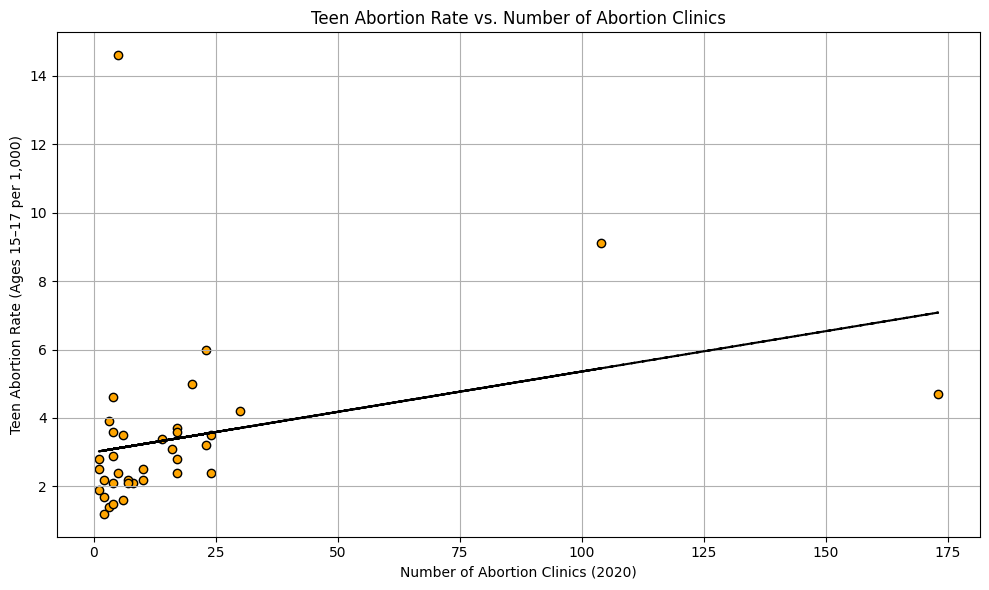

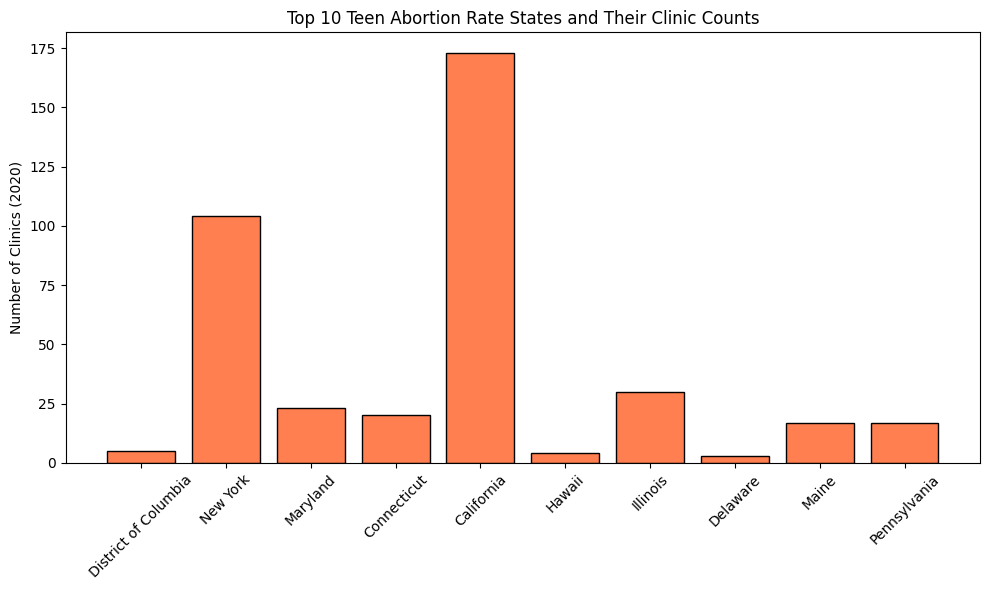

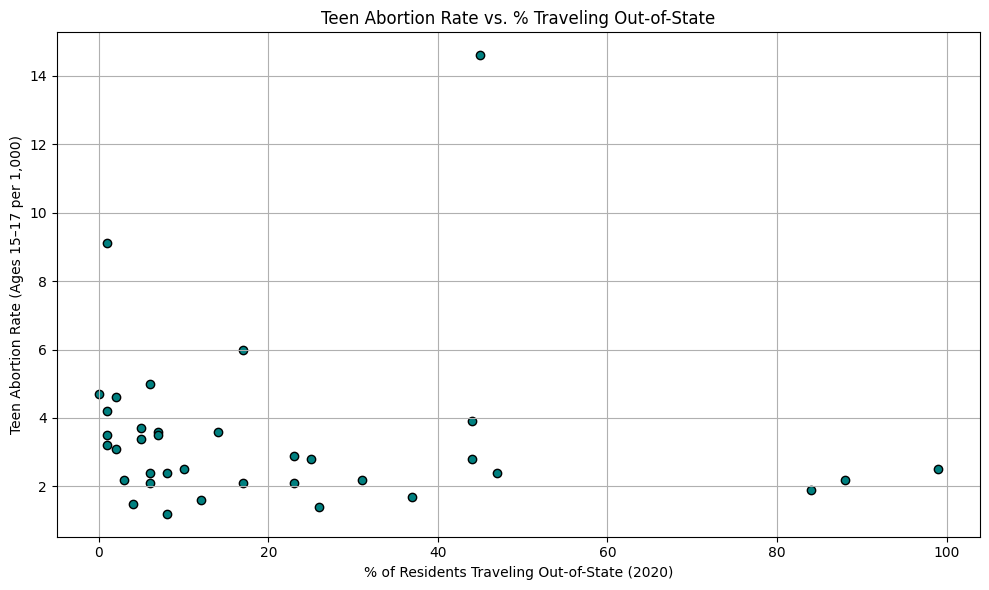

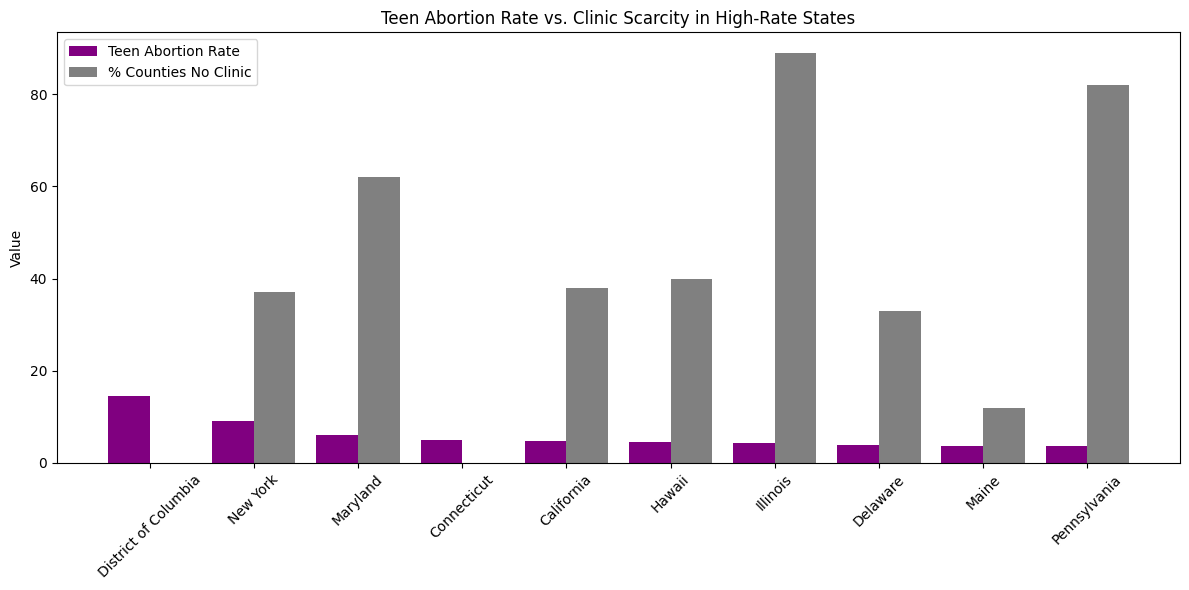

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume  is already loaded
df.columns = df.columns.str.strip()

# Select and clean relevant columns
df_teen = df[[
    'U.S. State',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
    'No. of abortion clinics, 2020',
    '% of counties without a known clinic, 2020',
    '% of residents obtaining abortions who traveled out of state for care, 2020'
]].dropna()

df_teen.columns = [
    'State',
    'Teen_Rate_15_17',
    'Clinics_2020',
    'Pct_Counties_No_Clinic',
    'Pct_Out_of_State'
]

# Convert columns to numeric
for col in ['Teen_Rate_15_17', 'Clinics_2020', 'Pct_Counties_No_Clinic', 'Pct_Out_of_State']:
    df_teen[col] = pd.to_numeric(df_teen[col], errors='coerce')

df_teen = df_teen.dropna()

# ---------------- Viz 1: Scatterplot – Teen Rate vs. Clinics ----------------
plt.figure(figsize=(10, 6))
x = df_teen['Clinics_2020']
y = df_teen['Teen_Rate_15_17']

plt.scatter(x, y, color='orange', edgecolor='black')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='--')  # regression line
plt.title("Teen Abortion Rate vs. Number of Abortion Clinics")
plt.xlabel("Number of Abortion Clinics (2020)")
plt.ylabel("Teen Abortion Rate (Ages 15–17 per 1,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 2: Bar Chart – Top Teen Abortion Rate States ----------------
top_teen = df_teen.sort_values('Teen_Rate_15_17', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_teen['State'], top_teen['Clinics_2020'], color='coral', edgecolor='black')
plt.title("Top 10 Teen Abortion Rate States and Their Clinic Counts")
plt.ylabel("Number of Clinics (2020)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------- Viz 3: Scatterplot – Teen Rate vs. % Traveling Out of State ----------------
plt.figure(figsize=(10, 6))
x = df_teen['Pct_Out_of_State']
y = df_teen['Teen_Rate_15_17']

plt.scatter(x, y, color='teal', edgecolor='black')
plt.title("Teen Abortion Rate vs. % Traveling Out-of-State")
plt.xlabel("% of Residents Traveling Out-of-State (2020)")
plt.ylabel("Teen Abortion Rate (Ages 15–17 per 1,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 4: Side-by-Side Bar – Teen Rate vs. % Counties Without Clinics ----------------
top_states = df_teen.sort_values('Teen_Rate_15_17', ascending=False).head(10)

bar_width = 0.4
indices = np.arange(len(top_states))

plt.figure(figsize=(12, 6))
plt.bar(indices, top_states['Teen_Rate_15_17'], width=bar_width, label='Teen Abortion Rate', color='purple')
plt.bar(indices + bar_width, top_states['Pct_Counties_No_Clinic'], width=bar_width, label='% Counties No Clinic', color='gray')

plt.xticks(indices + bar_width / 2, top_states['State'], rotation=45)
plt.title("Teen Abortion Rate vs. Clinic Scarcity in High-Rate States")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


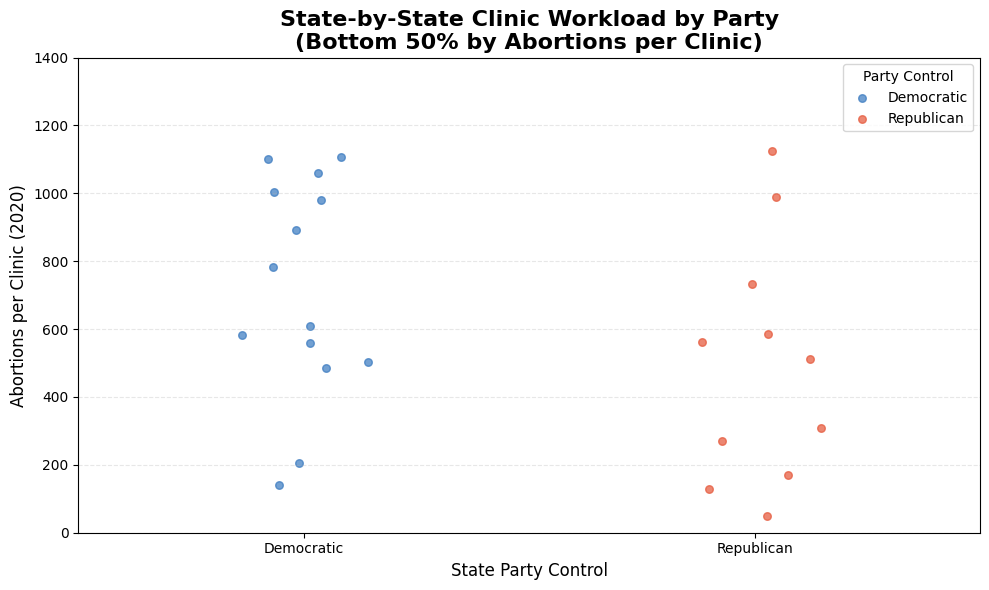

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Prepare the abortion data
abortion = abortion_df.copy()
abortion['Abortions_per_Clinic'] = abortion['Abortions_2020'] / abortion['Clinic_Count']
abortion = abortion.dropna(subset=['Party_Control'])

def bottom_half(group):
    return group.nsmallest(len(group)//2, 'Abortions_per_Clinic')

bottom_50 = (
    abortion.groupby('Party_Control', group_keys=False)
    .apply(bottom_half, include_groups=False)
)

bottom_50['Party_Control'] = abortion.set_index('State').loc[bottom_50['State']]['Party_Control'].values

# 2) Plot
fig, ax = plt.subplots(figsize=(10, 6))

party_color = {'Democratic': '#3778bf', 'Republican': '#e55537'}

for i, party in enumerate(['Democratic', 'Republican']):
    data = bottom_50[bottom_50['Party_Control'] == party]['Abortions_per_Clinic']
    # Add horizontal jitter
    x_jitter = np.random.normal(i, 0.08, size=len(data))
    ax.scatter(x_jitter, data, color=party_color[party], alpha=0.7, s=30, label=party)

# Axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Democratic', 'Republican'])
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1400)
ax.set_ylabel('Abortions per Clinic (2020)', fontsize=12)
ax.set_xlabel('State Party Control', fontsize=12)
ax.set_title('State-by-State Clinic Workload by Party\n(Bottom 50% by Abortions per Clinic)', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title="Party Control")

plt.tight_layout()
plt.show()


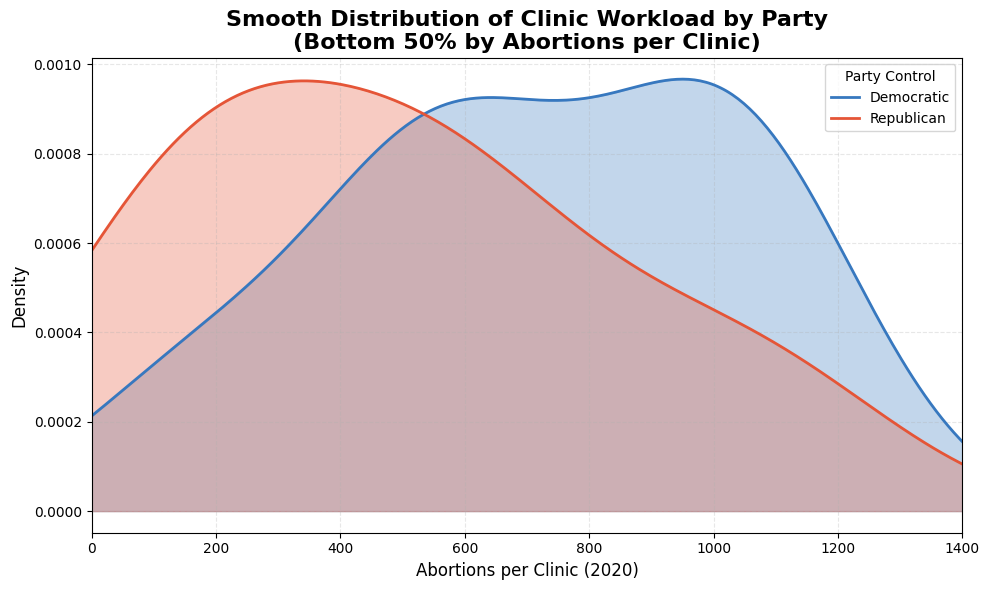

In [268]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# 1) Prepare the abortion data
abortion = abortion_df.copy()
abortion['Abortions_per_Clinic'] = abortion['Abortions_2020'] / abortion['Clinic_Count']
abortion = abortion.dropna(subset=['Party_Control'])

def bottom_half(group):
    return group.nsmallest(len(group)//2, 'Abortions_per_Clinic')

bottom_50 = (
    abortion.groupby('Party_Control', group_keys=False)
    .apply(bottom_half, include_groups=False)
)

bottom_50['Party_Control'] = abortion.set_index('State').loc[bottom_50['State']]['Party_Control'].values

# 2) KDEs
dem_data = bottom_50[bottom_50['Party_Control'] == 'Democratic']['Abortions_per_Clinic']
rep_data = bottom_50[bottom_50['Party_Control'] == 'Republican']['Abortions_per_Clinic']

kde_dem = gaussian_kde(dem_data)
kde_rep = gaussian_kde(rep_data)

x = np.linspace(0, 1400, 300)
dem_density = kde_dem(x)
rep_density = kde_rep(x)

# 3) Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, dem_density, color='#3778bf', lw=2, label='Democratic')
ax.fill_between(x, 0, dem_density, color='#3778bf', alpha=0.3)

ax.plot(x, rep_density, color='#e55537', lw=2, label='Republican')
ax.fill_between(x, 0, rep_density, color='#e55537', alpha=0.3)

# Styling
ax.set_xlim(0, 1400)
ax.set_xlabel('Abortions per Clinic (2020)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Smooth Distribution of Clinic Workload by Party\n(Bottom 50% by Abortions per Clinic)', fontsize=16, fontweight='bold')
ax.legend(title='Party Control')
ax.grid(axis='both', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



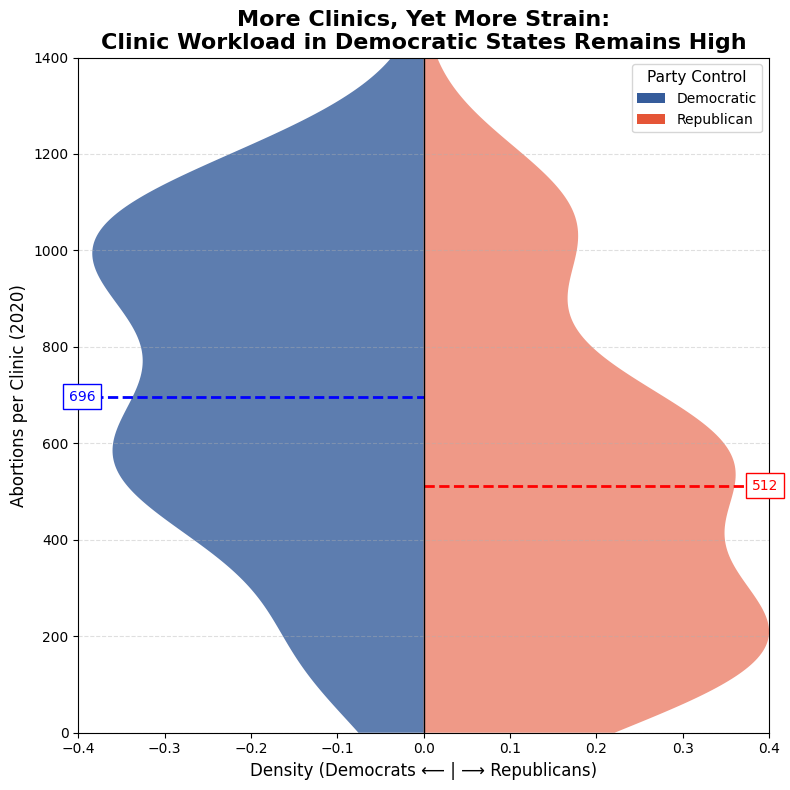

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch

# Data prep
abortion = abortion_df.copy()
abortion['Abortions_per_Clinic'] = abortion['Abortions_2020'] / abortion['Clinic_Count']
abortion = abortion.dropna(subset=['Party_Control'])

def bottom_half(group):
    return group.nsmallest(len(group)//2, 'Abortions_per_Clinic')

bottom_50 = (
    abortion.groupby('Party_Control', group_keys=False)
    .apply(bottom_half, include_groups=False)
)
bottom_50['Party_Control'] = abortion.set_index('State').loc[bottom_50['State']]['Party_Control'].values

dem_data = bottom_50[bottom_50['Party_Control'] == 'Democratic']['Abortions_per_Clinic']
rep_data = bottom_50[bottom_50['Party_Control'] == 'Republican']['Abortions_per_Clinic']

# Bandwidth
kde_dem = gaussian_kde(dem_data, bw_method=0.5)
kde_rep = gaussian_kde(rep_data, bw_method=0.4)

# x
x = np.linspace(0, 1400, 300)

dem_density = kde_dem(x)
rep_density = kde_rep(x)

max_density = max(dem_density.max(), rep_density.max())
dem_density = dem_density / max_density * 0.4
rep_density = rep_density / max_density * 0.4

# Plot
fig, ax = plt.subplots(figsize=(8,8))

# Fill sides
ax.fill_betweenx(x, -dem_density, np.zeros_like(x), facecolor='#355C9B', alpha=0.8)
ax.fill_betweenx(x, np.zeros_like(x), rep_density, facecolor='#e55537', alpha=0.6)

# Medians
# Compute medians
dem_median = dem_data.median()
rep_median = rep_data.median()

# Draw median lines
ax.hlines(dem_median, xmin=-0.4, xmax=0, color='blue', linestyle='--', lw=2)
ax.hlines(rep_median, xmin=0,    xmax=0.4, color='red',  linestyle='--', lw=2)

# Annotate median values with text boxes
ax.text(
    -0.38, dem_median,               # x, y
    f"{dem_median:.0f}",             # text
    color='blue',
    va='center', ha='right',         # align
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='blue')
)

ax.text(
     0.38, rep_median,
     f"{rep_median:.0f}",
     color='red',
     va='center', ha='left',
     fontsize=10,
     bbox=dict(facecolor='white', edgecolor='red')
)

# Legend
handles = [
    Patch(facecolor='#355C9B', label='Democratic'),
    Patch(facecolor='#e55537', label='Republican')
]
ax.legend(handles=handles, loc='upper right', title="Party Control", fontsize=10, title_fontsize=11)

# Style
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(0, 1400)
ax.set_xlabel('Density (Democrats ⟵ | ⟶ Republicans)', fontsize=12)
ax.set_ylabel('Abortions per Clinic (2020)', fontsize=12)
ax.set_title('More Clinics, Yet More Strain:\nClinic Workload in Democratic States Remains High', fontsize=16, fontweight='bold')
ax.axvline(0, color='black', lw=1)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



In [260]:

import pandas as pd

# Load existing abortion dataset
f = pd.read_excel('/Users/evelynzhang/Downloads/GuttmacherInstituteAbortionDataByState.xlsx', engine='openpyxl')
df=f
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify columns that should be numeric (all except these)
non_numeric_cols = ['U.S. State', 'Party']
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

# Convert all numeric-looking columns to actual numbers
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'Unavailable' becomes NaN





# Add a party control map (as of 2020 presidential election or recent governor)
party_map = {
    'Alabama': 'Republican', 'Alaska': 'Republican', 'Arizona': 'Democratic', 'Arkansas': 'Republican',
    'California': 'Democratic', 'Colorado': 'Democratic', 'Connecticut': 'Democratic', 'Delaware': 'Democratic',
    'Florida': 'Republican', 'Georgia': 'Republican', 'Hawaii': 'Democratic', 'Idaho': 'Republican',
    'Illinois': 'Democratic', 'Indiana': 'Republican', 'Iowa': 'Republican', 'Kansas': 'Democratic',
    'Kentucky': 'Democratic', 'Louisiana': 'Democratic', 'Maine': 'Democratic', 'Maryland': 'Democratic',
    'Massachusetts': 'Democratic', 'Michigan': 'Democratic', 'Minnesota': 'Democratic', 'Mississippi': 'Republican',
    'Missouri': 'Republican', 'Montana': 'Republican', 'Nebraska': 'Republican', 'Nevada': 'Democratic',
    'New Hampshire': 'Republican', 'New Jersey': 'Democratic', 'New Mexico': 'Democratic', 'New York': 'Democratic',
    'North Carolina': 'Democratic', 'North Dakota': 'Republican', 'Ohio': 'Republican', 'Oklahoma': 'Republican',
    'Oregon': 'Democratic', 'Pennsylvania': 'Democratic', 'Rhode Island': 'Democratic', 'South Carolina': 'Republican',
    'South Dakota': 'Republican', 'Tennessee': 'Republican', 'Texas': 'Republican', 'Utah': 'Republican',
    'Vermont': 'Democratic', 'Virginia': 'Democratic', 'Washington': 'Democratic', 'West Virginia': 'Republican',
    'Wisconsin': 'Democratic', 'Wyoming': 'Republican', 'District of Columbia': 'Democratic'
}

# Add party column
df['Party'] = df['U.S. State'].map(party_map)





In [5]:
df_ideology

,State,Party,Clinics_2020,Pct_No_Clinic_Counties,Pct_Travel_OutOfState,Teen_Rate_15_17,Abortion_Rate_15_44
0,Alabama,Republican,5,93,47,2.4,6.0
1,Alaska,Republican,4,87,7,3.6,8.6
2,Arizona,Democratic,8,80,6,2.1,9.3
3,Arkansas,Republican,2,99,37,1.7,5.6
4,California,Democratic,173,38,0,4.7,19.2
5,Colorado,Democratic,23,77,1,3.2,11.2
6,Connecticut,Democratic,20,0,6,5.0,16.7
7,Delaware,Democratic,3,33,44,3.9,10.0
8,District of Columbia,Democratic,5,0,45,14.6,48.9
10,Georgia,Republican,14,95,5,3.4,18.9


<Figure size 800x600 with 0 Axes>

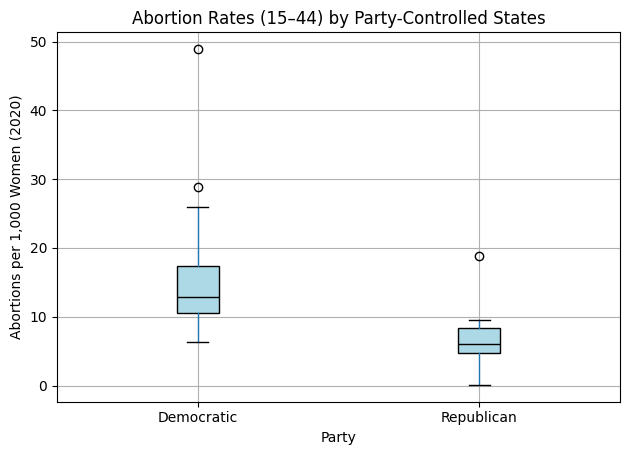

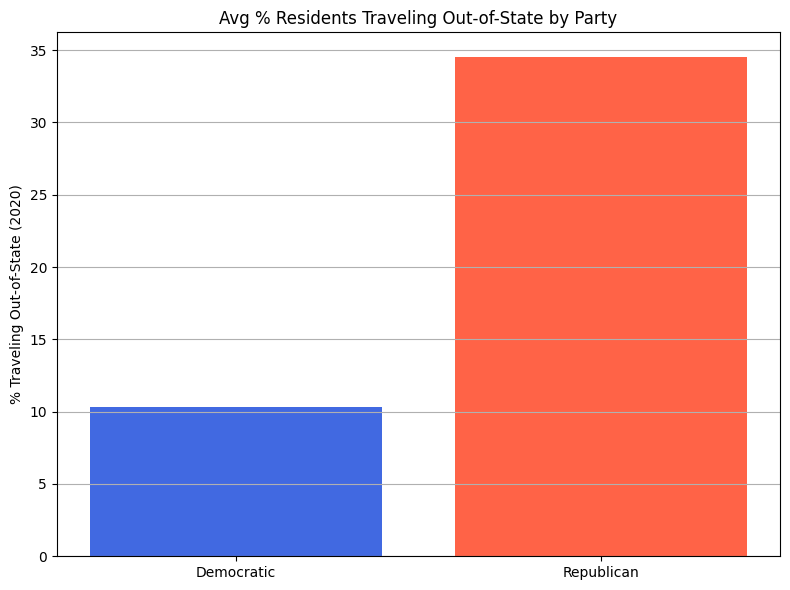

<Figure size 800x600 with 0 Axes>

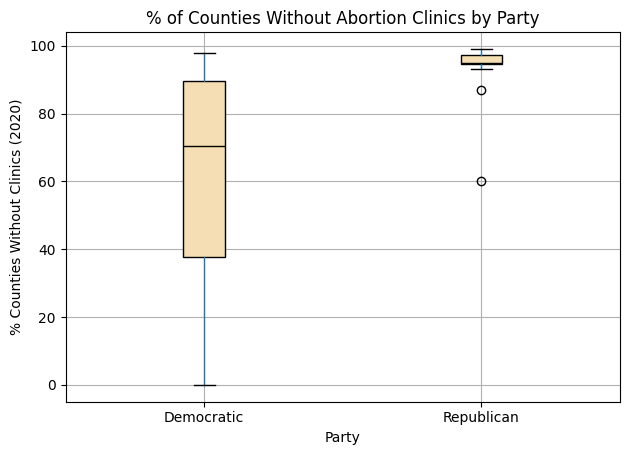

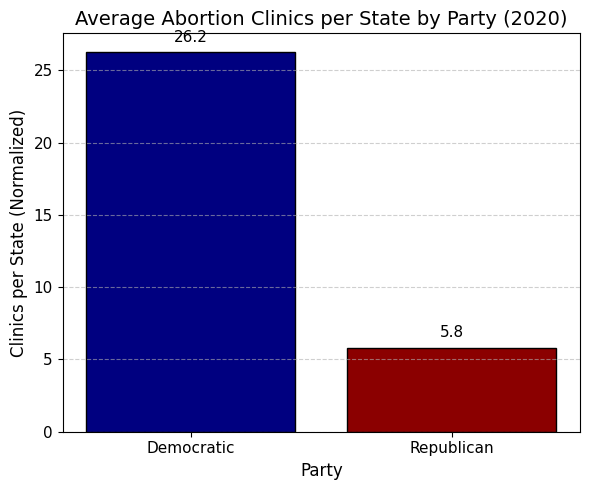

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Viz 1: Boxplot – Abortion Rate by Party ----------------
plt.figure(figsize=(8, 6))
df_ideology.boxplot(column='Abortion_Rate_15_44', by='Party', patch_artist=True,
                    boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title("Abortion Rates (15–44) by Party-Controlled States")
plt.suptitle("")
plt.xlabel("Party")
plt.ylabel("Abortions per 1,000 Women (2020)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 2: Bar – Avg % Traveling Out-of-State by Party ----------------
party_travel = df_ideology.groupby('Party')['Pct_Travel_OutOfState'].mean().sort_values()

plt.figure(figsize=(8, 6))
plt.bar(party_travel.index, party_travel.values, color=['royalblue', 'tomato'])
plt.title("Avg % Residents Traveling Out-of-State by Party")
plt.ylabel("% Traveling Out-of-State (2020)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ---------------- Viz 3: Boxplot – % Counties Without Clinics by Party ----------------
plt.figure(figsize=(8, 6))
df_ideology.boxplot(column='Pct_No_Clinic_Counties', by='Party', patch_artist=True,
                    boxprops=dict(facecolor='wheat'), medianprops=dict(color='black'))
plt.title("% of Counties Without Abortion Clinics by Party")
plt.suptitle("")
plt.xlabel("Party")
plt.ylabel("% Counties Without Clinics (2020)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Viz 4: Bar Chart – Total Clinics by Party ----------------


import matplotlib.pyplot as plt

# Recalculate if needed
party_groups = df_ideology.groupby('Party')
total_clinics = party_groups['Clinics_2020'].sum()
num_states = party_groups.size()
avg_clinics_per_state = total_clinics / num_states

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(
    avg_clinics_per_state.index,
    avg_clinics_per_state.values,
    color=['navy', 'darkred'],
    edgecolor='black'
)

# Titles and Labels
plt.title('Average Abortion Clinics per State by Party (2020)', fontsize=14)
plt.ylabel('Clinics per State (Normalized)', fontsize=12)
plt.xlabel('Party', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,
        f'{yval:.1f}',
        ha='center',
        va='bottom',
        fontsize=11
    )

# Final touches
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()



In [4]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

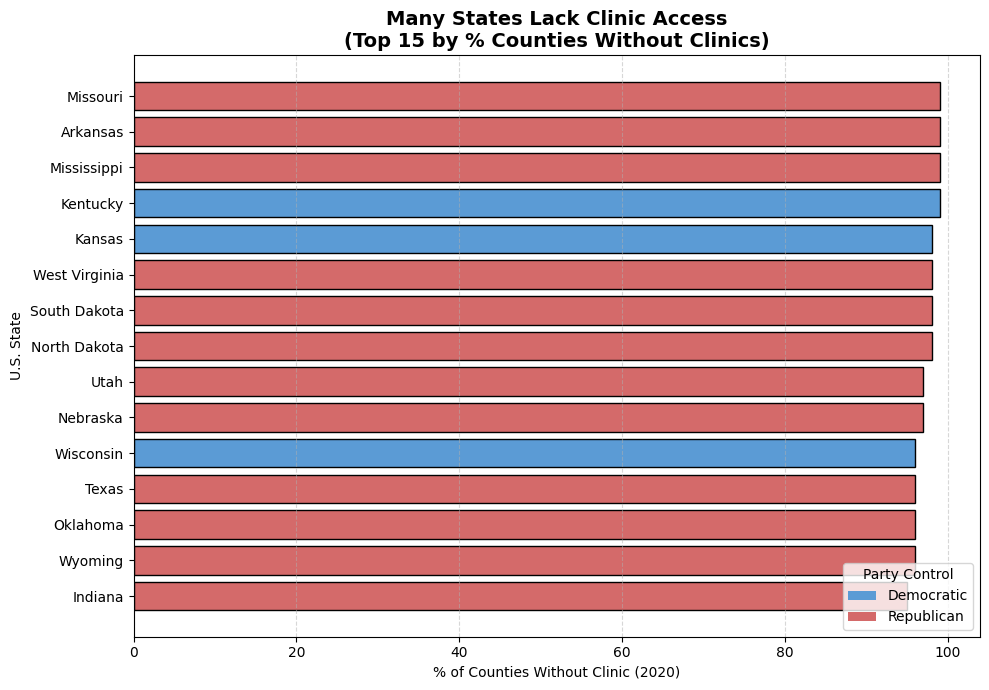

In [172]:
# Prepare data
top_missing = abortion_df[['U.S. State', 'Party', '% of counties without a known clinic, 2020']].dropna()
top_missing = top_missing.sort_values(by='% of counties without a known clinic, 2020', ascending=False).head(15)

states = top_missing['U.S. State']
missing_pct = top_missing['% of counties without a known clinic, 2020']
colors = ['#5B9BD5' if party == 'Democratic' else '#d46a6a' for party in top_missing['Party']]

# Plot
fig, ax = plt.subplots(figsize=(10,7))
bars = ax.barh(states, missing_pct, color=colors, edgecolor='black')

ax.set_title('Many States Lack Clinic Access\n(Top 15 by % Counties Without Clinics)', fontsize=14, weight='bold')
ax.set_xlabel('% of Counties Without Clinic (2020)')
ax.set_ylabel('U.S. State')
ax.invert_yaxis()  # Largest at top
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Create manual legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#5B9BD5', label='Democratic'),
    Patch(facecolor='#d46a6a', label='Republican')
]
ax.legend(handles=legend_elements, title='Party Control', loc='lower right')

plt.tight_layout()
plt.show()



In [167]:

# Add a party control map (as of 2020 presidential election or recent governor)
party_map = {
    'Alabama': 'Republican', 'Alaska': 'Republican', 'Arizona': 'Democratic', 'Arkansas': 'Republican',
    'California': 'Democratic', 'Colorado': 'Democratic', 'Connecticut': 'Democratic', 'Delaware': 'Democratic',
    'Florida': 'Republican', 'Georgia': 'Republican', 'Hawaii': 'Democratic', 'Idaho': 'Republican',
    'Illinois': 'Democratic', 'Indiana': 'Republican', 'Iowa': 'Republican', 'Kansas': 'Democratic',
    'Kentucky': 'Democratic', 'Louisiana': 'Democratic', 'Maine': 'Democratic', 'Maryland': 'Democratic',
    'Massachusetts': 'Democratic', 'Michigan': 'Democratic', 'Minnesota': 'Democratic', 'Mississippi': 'Republican',
    'Missouri': 'Republican', 'Montana': 'Republican', 'Nebraska': 'Republican', 'Nevada': 'Democratic',
    'New Hampshire': 'Republican', 'New Jersey': 'Democratic', 'New Mexico': 'Democratic', 'New York': 'Democratic',
    'North Carolina': 'Democratic', 'North Dakota': 'Republican', 'Ohio': 'Republican', 'Oklahoma': 'Republican',
    'Oregon': 'Democratic', 'Pennsylvania': 'Democratic', 'Rhode Island': 'Democratic', 'South Carolina': 'Republican',
    'South Dakota': 'Republican', 'Tennessee': 'Republican', 'Texas': 'Republican', 'Utah': 'Republican',
    'Vermont': 'Democratic', 'Virginia': 'Democratic', 'Washington': 'Democratic', 'West Virginia': 'Republican',
    'Wisconsin': 'Democratic', 'Wyoming': 'Republican', 'District of Columbia': 'Democratic'
}

# Add party column
df['Party'] = df['U.S. State'].map(party_map)

df_new=df.copy()
# df_new.rename(columns={
#     '% of residents obtaining abortions who traveled out of state for care, 2020':
#     'TravelOutOfState'
# }, inplace=True)



In [261]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

In [ ]:
abotion_df

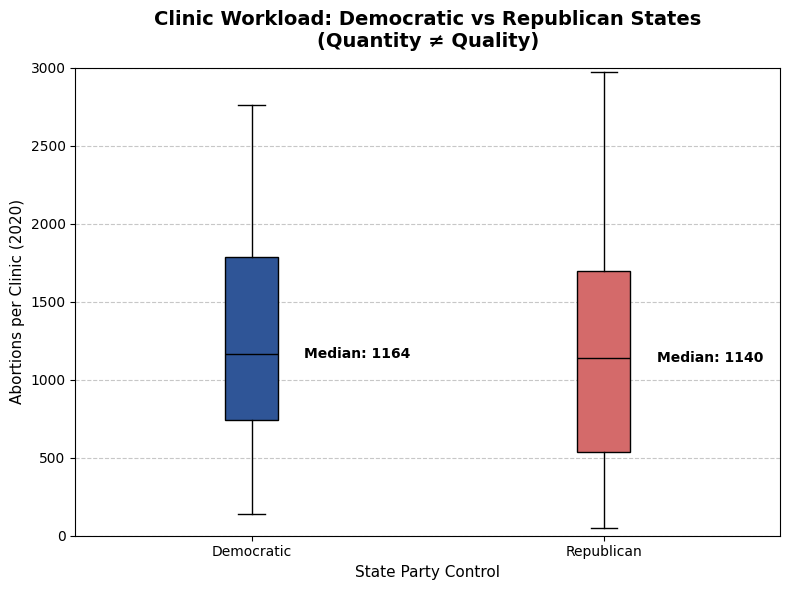

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your df is already loaded and cleaned
abortion_df = df.copy()
abortion_df = abortion_df.rename(columns={
    'U.S. State': 'State',
    'No. of abortions, by state of occurrence, 2020': 'Abortions_2020',
    'No. of abortion clinics, 2020': 'Clinic_Count',
    'Party': 'Party_Control'
})
abortion_df = abortion_df.dropna(subset=['Party_Control', 'Abortions_2020', 'Clinic_Count'])

# Calculate abortions per clinic
abortion_df['Abortions_per_Clinic'] = abortion_df['Abortions_2020'] / abortion_df['Clinic_Count']

# Split by party
democratic = abortion_df[abortion_df['Party_Control'] == 'Democratic']['Abortions_per_Clinic']
republican = abortion_df[abortion_df['Party_Control'] == 'Republican']['Abortions_per_Clinic']

# Prepare plot
fig, ax = plt.subplots(figsize=(8,6))

# Custom colors (darken Democratic slightly)
colors = ['#2f5597', '#d46a6a']  # Democratic darker blue, Republican reddish

bp = ax.boxplot(
    [democratic, republican],
    patch_artist=True,
    labels=['Democratic', 'Republican'],
    medianprops=dict(color='black')
)

# Fill boxes manually
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Annotate medians
medians = [np.median(democratic), np.median(republican)]
for i, median in enumerate(medians):
    ax.text(i+1.15, median, f"Median: {int(median)}", va='center', ha='left', fontsize=10, fontweight='bold')

# Title and labels
ax.set_title('Clinic Workload: Democratic vs Republican States\n(Quantity ≠ Quality)', fontsize=14, weight='bold', pad=15)
ax.set_ylabel('Abortions per Clinic (2020)', fontsize=11)
ax.set_xlabel('State Party Control', fontsize=11)

# Zoom Y-axis
ax.set_ylim(0, 3000)

# Grid for easier reading
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Save if needed
# plt.savefig('clinic_workload_comparison.png', dpi=300)

plt.show()





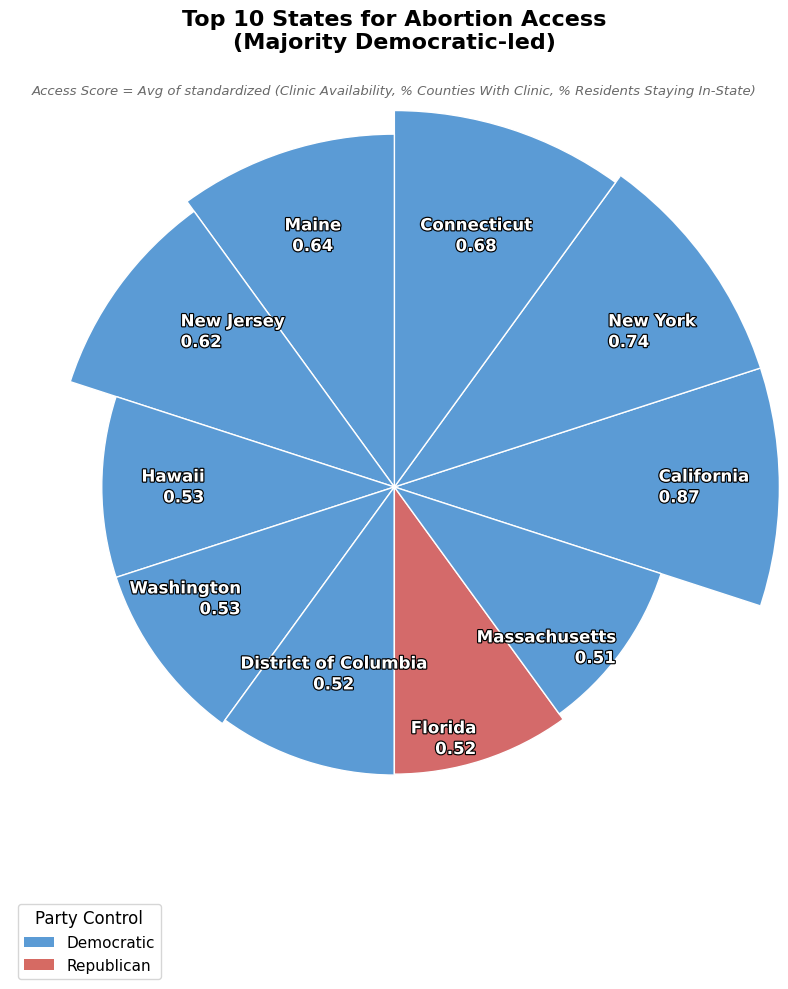

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects


# Assume abortion_df is already loaded and cleaned

abortion_df = df.copy()
abortion_df = abortion_df.rename(columns={
    'U.S. State': 'State',
    '% of residents obtaining abortions who traveled out of state for care, 2020': 'Travel_Out_State_Pct',
    '% of counties without a known clinic, 2020': 'No_Clinic_County_Pct',
    'No. of abortion clinics, 2020': 'Clinic_Count',
    'Party': 'Party_Control'
})
abortion_df = abortion_df.dropna(subset=['Party_Control'])

# Standardize each metric
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

abortion_df['Clinic_Count_scaled'] = min_max_scale(abortion_df['Clinic_Count'])
abortion_df['No_Clinic_County_Pct_scaled'] = min_max_scale(abortion_df['No_Clinic_County_Pct'])
abortion_df['Travel_Out_State_Pct_scaled'] = min_max_scale(abortion_df['Travel_Out_State_Pct'])

# Flip bad metrics
abortion_df['Access_No_Clinic_County_Pct_scaled'] = 1 - abortion_df['No_Clinic_County_Pct_scaled']
abortion_df['Access_Travel_Out_State_Pct_scaled'] = 1 - abortion_df['Travel_Out_State_Pct_scaled']

# Average access score
abortion_df['Avg_Access_Score'] = (
    abortion_df['Clinic_Count_scaled'] +
    abortion_df['Access_No_Clinic_County_Pct_scaled'] +
    abortion_df['Access_Travel_Out_State_Pct_scaled']
) / 3

# Prepare top 10 states
top_10_states = abortion_df.sort_values(by='Avg_Access_Score', ascending=False).head(10)
labels = top_10_states['State'].tolist()
scores_raw = top_10_states['Avg_Access_Score'].tolist()
scores = (top_10_states['Avg_Access_Score'] * 1.5).tolist()
parties = top_10_states['Party_Control'].tolist()

# Color mapping
party_color_map = {
    'Democratic': '#5B9BD5',
    'Republican': '#d46a6a'
}
colors = [party_color_map[party] for party in parties]

# Angles
N = len(scores)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# Plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

bars = ax.bar(
    theta,
    scores,
    width=2*np.pi/N,
    bottom=0.0,
    color=colors,
    edgecolor='white',
    linewidth=1
)

max_score = max(scores)

# Bottom 5 states list
bottom_states = ['Washington', 'District of Columbia', 'Massachusetts', 'Florida', 'Hawaii']
for i, bar in enumerate(bars):
    angle = np.rad2deg(theta[i])

    # Dynamic label radius
    if scores[i] < 0.8:
        r_label = scores[i] * 0.65
    else:
        r_label = max_score * 0.55

    # Default alignment rules
    if 70 <= angle <= 110:
        ha = 'center'
    elif 250 <= angle <= 290:
        ha = 'center'
    elif 0 <= angle < 180:
        ha = 'left'
    else:
        ha = 'right'

    # Special tweak: if label is Massachusetts
    if labels[i] == 'Massachusetts':
        ha = 'right'
        r_label *= 1.5  # push it outward a bit more
    if labels[i] == 'Florida':
        ha = 'right'
        r_label *= 1.35  # push it outward a bit more
    # Push outward for bottom states too
    if 240 <= angle <= 300:
        r_label *= 1.05

    #     weight='bold'

    txt = ax.text(
        theta[i],
        r_label,
        f"{labels[i]}\n{scores_raw[i]:.2f}",
        ha=ha,
        va='center',
        rotation=0,
        fontsize=12,
        color='white',
        weight='bold'
    )
    txt.set_path_effects([path_effects.Stroke(linewidth=1.7, foreground='black'),
                          path_effects.Normal()])
    


# Title
ax.set_title('Top 10 States for Abortion Access\n(Majority Democratic-led)',
             fontsize=16, weight='bold', pad=20)
fig.text(0.5, 0.9, 
         'Access Score = Avg of standardized (Clinic Availability, % Counties With Clinic, % Residents Staying In-State)', 
         ha='center', 
         fontsize=9.5, 
         color='dimgray', 
         style='italic')


# Remove grid
ax.set_ylim(0, max(scores) * 0.8)
ax.margins(0)
ax.set_axis_off()


# Manual legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#5B9BD5', label='Democratic'),
    Patch(facecolor='#D66A63', label='Republican')
]
ax.legend(handles=legend_elements, title='Party Control', loc='lower left', bbox_to_anchor=(0, -0.15), fontsize=11, title_fontsize=12)
plt.subplots_adjust(left=0.08, right=0.92, top=0.85, bottom=0.08)
plt.savefig('/Users/evelynzhang/Documents/GitHub/portfolio/project2/FOR_chart.png')
plt.tight_layout()
plt.show()




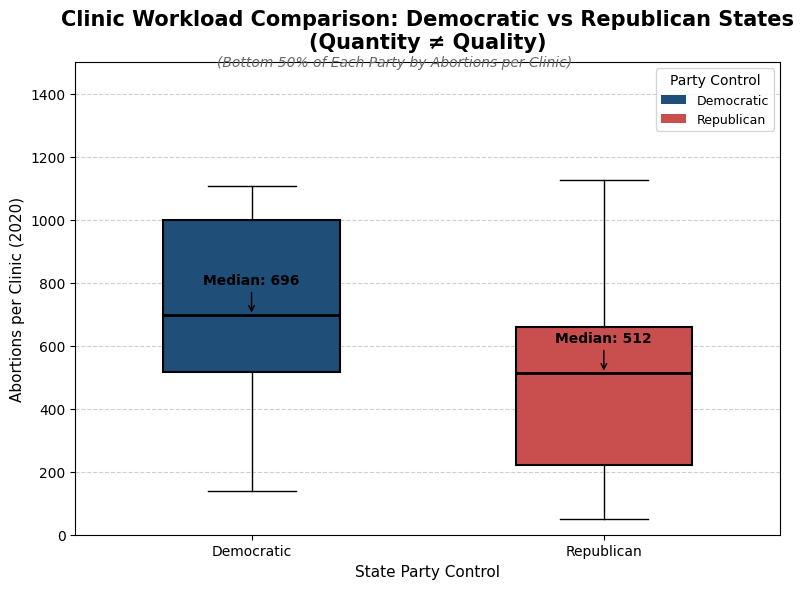

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects

# Assume abortion_df already filtered (bottom 50% both parties separately)

# Prepare bottom 50% sampling
bottom_dems = abortion_df[abortion_df['Party_Control'] == 'Democratic'].nsmallest(len(abortion_df[abortion_df['Party_Control']=='Democratic'])//2, 'Abortions_per_Clinic')
bottom_reps = abortion_df[abortion_df['Party_Control'] == 'Republican'].nsmallest(len(abortion_df[abortion_df['Party_Control']=='Republican'])//2, 'Abortions_per_Clinic')
subset_df = pd.concat([bottom_dems, bottom_reps])

# Group
grouped = subset_df.groupby('Party_Control')['Abortions_per_Clinic']

# Colors
party_colors = {
    'Democratic': '#1f4e79',  # deep strong blue
    'Republican': '#c94f4f'   # vivid but not neon red
}
colors = [party_colors['Democratic'], party_colors['Republican']]

# Plot
fig, ax = plt.subplots(figsize=(8,6))

bp = ax.boxplot(
    [grouped.get_group('Democratic'), grouped.get_group('Republican')],
    patch_artist=True,
    labels=['Democratic', 'Republican'],
    showfliers=False,
    widths=0.5
)

# Coloring boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Bold black median lines
for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# Set Y axis tighter
ax.set_ylim(0, 1500)

# Title
ax.set_title('Clinic Workload Comparison: Democratic vs Republican States\n(Quantity ≠ Quality)', fontsize=15, weight='bold', pad=10)

# Subtitle
fig.text(0.5, 0.88, '(Bottom 50% of Each Party by Abortions per Clinic)', ha='center', fontsize=10, color='dimgray', style='italic')

# Median Annotations
dem_median = int(np.median(grouped.get_group('Democratic')))
rep_median = int(np.median(grouped.get_group('Republican')))

for i, (party, median_value) in enumerate(zip(['Democratic', 'Republican'], [dem_median, rep_median])):
    x = i + 1
    ax.annotate(f'Median: {median_value}', 
                xy=(x, median_value), 
                xytext=(x, median_value+100),
                ha='center', 
                fontsize=10, 
                weight='bold',
                arrowprops=dict(arrowstyle='->', color='black'))

# Axis Labels
ax.set_ylabel('Abortions per Clinic (2020)', fontsize=11)
ax.set_xlabel('State Party Control', fontsize=11)

# Minor grid
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Legend
handles = [Patch(facecolor=party_colors['Democratic'], label='Democratic'),
           Patch(facecolor=party_colors['Republican'], label='Republican')]
ax.legend(handles=handles, title='Party Control', loc='upper right', fontsize=9, title_fontsize=10)

# Final formatting
plt.subplots_adjust(left=0.12, right=0.95, top=0.83, bottom=0.15)
plt.tight_layout()
plt.show()





/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_32975/24740601.py:17: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_32975/24740601.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



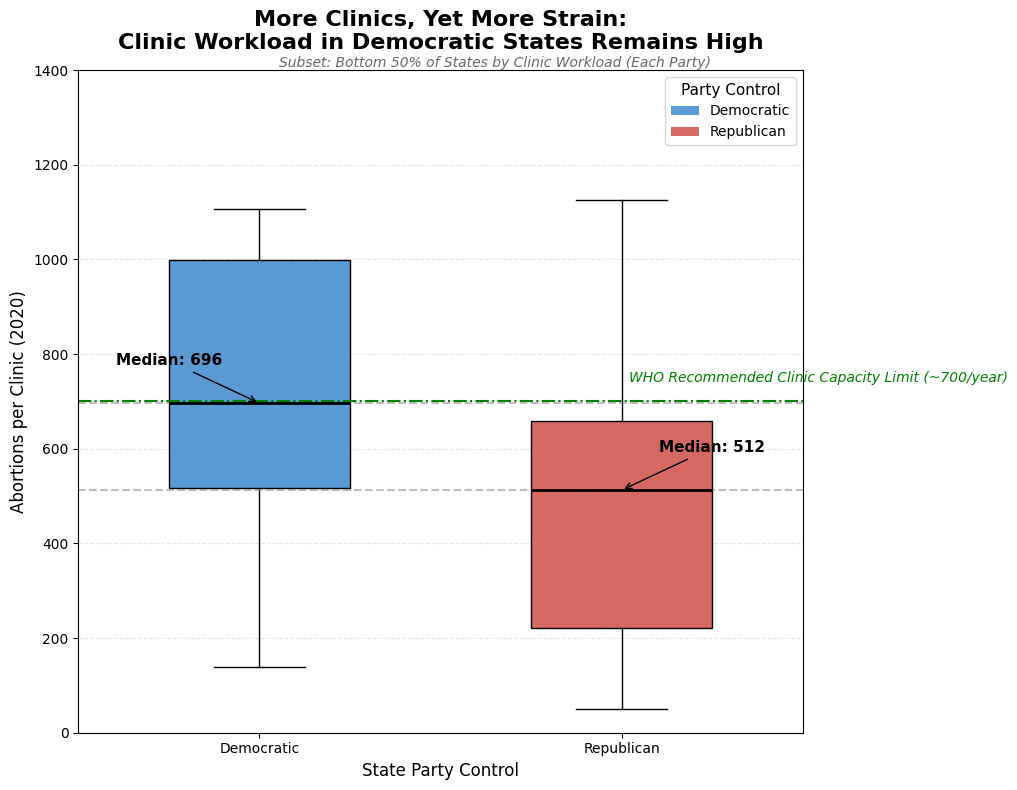

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects

# Assume abortion_df already preloaded and cleaned
# (your previous preprocessing steps stay the same)

# Select bottom 50% per party based on abortions per clinic
df_copy = df.copy()
df_copy['Abortions_per_Clinic'] = df_copy['No. of abortions, by state of occurrence, 2020'] / df_copy['No. of abortion clinics, 2020']
df_copy = df_copy.dropna(subset=['Abortions_per_Clinic', 'Party'])

bottom_half = (
    df_copy.groupby('Party', group_keys=False)
    .apply(lambda x: x.nsmallest(len(x)//2, 'Abortions_per_Clinic'))
)

# Extract data
data = bottom_half[['Party', 'Abortions_per_Clinic']]
data['Party'] = data['Party'].map({'Democratic': 'Democratic', 'Republican': 'Republican'})  # Clean names if needed

# Color mapping
party_color = {'Democratic': '#5B9BD5', 'Republican': '#D66A63'}

# Plot
fig, ax = plt.subplots(figsize=(10,8))

# Boxplot
bp = ax.boxplot(
    [data[data['Party'] == 'Democratic']['Abortions_per_Clinic'],
     data[data['Party'] == 'Republican']['Abortions_per_Clinic']],
    patch_artist=True,
    widths=0.5
)

# Custom coloring
for patch, color in zip(bp['boxes'], [party_color['Democratic'], party_color['Republican']]):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in bp['whiskers']:
    whisker.set(color='black')
for cap in bp['caps']:
    cap.set(color='black')
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Set x-ticks
ax.set_xticklabels(['Democratic', 'Republican'])

# Y-axis limits
ax.set_ylim(0, 1400)


for median_val in [dem_median, rep_median]:
    ax.axhline(median_val, linestyle='--', color='gray', alpha=0.5)

# Annotate medians with arrows
props = dict(arrowstyle="->", color='black')
ax.annotate(f'Median: {int(dem_median)}', xy=(1, dem_median), xytext=(0.75, dem_median+80),
            ha='center', fontsize=11, fontweight='bold', arrowprops=props)

ax.annotate(f'Median: {int(rep_median)}', xy=(2, rep_median), xytext=(2.25, rep_median+80),
            ha='center', fontsize=11, fontweight='bold', arrowprops=props)

# Titles

ax.set_title('More Clinics, Yet More Strain:\nClinic Workload in Democratic States Remains High', fontsize=16, fontweight='bold',pad=15)
fig.text(0.5, 0.91, 
         'Subset: Bottom 50% of States by Clinic Workload (Each Party)', 
         ha='center', fontsize=10, color='dimgray', style='italic')

# Legend
legend_elements = [
    Patch(facecolor=party_color['Democratic'], label='Democratic'),
    Patch(facecolor=party_color['Republican'], label='Republican')
]
ax.legend(handles=legend_elements, title='Party Control', loc='upper right', fontsize=10, title_fontsize=11)

ax.axhline(700, linestyle='-.', color='green', linewidth=1.5)
ax.text(2.02, 750, 'WHO Recommended Clinic Capacity Limit (~700/year)',
        va='center', fontsize=10, color='green', style='italic')

# Style tweaks
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylabel('Abortions per Clinic (2020)', fontsize=12)
ax.set_xlabel('State Party Control', fontsize=12)

plt.subplots_adjust(left=0.08, right=0.92, top=0.88, bottom=0.1)
plt.tight_layout()
plt.show()


/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_32975/1336892817.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_32975/1336892817.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



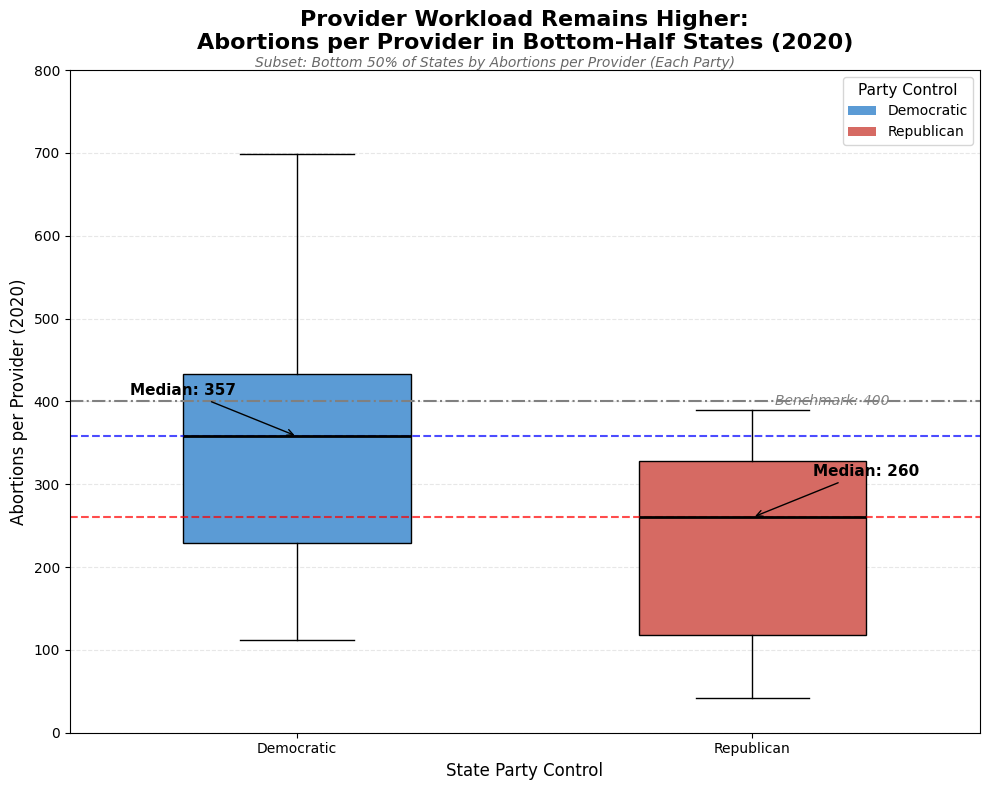

In [311]:
df_copy = df.copy()

df_copy['Abortions_per_Provider'] = (
    df['No. of abortions, by state of occurrence, 2020'] /
    df['No. of abortion providers, 2017']
)



# Step 4: Select bottom 50% per party based on Abortions per Provider
bottom_half_prov = (
    df_copy.groupby('Party', group_keys=False)
    .apply(lambda x: x.nsmallest(len(x)//2, 'Abortions_per_Provider'))
)

# Prepare data for plotting
data_prov = bottom_half_prov[['Party', 'Abortions_per_Provider']]
data_prov['Party'] = data_prov['Party'].map({'Democratic': 'Democratic', 'Republican': 'Republican'})

# Compute medians
dem_median_prov = data_prov[data_prov['Party'] == 'Democratic']['Abortions_per_Provider'].median()
rep_median_prov = data_prov[data_prov['Party'] == 'Republican']['Abortions_per_Provider'].median()

# Step 5: Plot
benchmark_provider = 400  # Benchmark value

fig, ax = plt.subplots(figsize=(10,8))

bp = ax.boxplot(
    [data_prov[data_prov['Party'] == 'Democratic']['Abortions_per_Provider'],
     data_prov[data_prov['Party'] == 'Republican']['Abortions_per_Provider']],
    patch_artist=True,
    widths=0.5
)

# Coloring
party_colors = ['#5B9BD5', '#D66A63']
for patch, color in zip(bp['boxes'], party_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in bp['whiskers']:
    whisker.set(color='black')
for cap in bp['caps']:
    cap.set(color='black')
for median in bp['medians']:
    median.set(color='black', linewidth=2)

ax.set_xticklabels(['Democratic', 'Republican'])
ax.set_ylim(0, 800)

# Draw benchmark line
ax.axhline(benchmark_provider, linestyle='-.', color='gray', linewidth=1.5)
ax.text(2.05, benchmark_provider, 'Benchmark: 400', va='center',
        fontsize=10, color='gray', style='italic')

# Draw median lines
ax.axhline(dem_median_prov, linestyle='--', color='blue', alpha=0.7)
ax.axhline(rep_median_prov, linestyle='--', color='red', alpha=0.7)

# Annotate medians
props = dict(arrowstyle="->", color='black')
ax.annotate(f'Median: {int(dem_median_prov)}', xy=(1, dem_median_prov), xytext=(0.75, dem_median_prov+50),
            ha='center', fontsize=11, fontweight='bold', arrowprops=props)
ax.annotate(f'Median: {int(rep_median_prov)}', xy=(2, rep_median_prov), xytext=(2.25, rep_median_prov+50),
            ha='center', fontsize=11, fontweight='bold', arrowprops=props)

# Titles and labels
ax.set_title('Provider Workload Remains Higher:\nAbortions per Provider in Bottom-Half States (2020)', 
             fontsize=16, fontweight='bold', pad=15)
fig.text(0.5, 0.91, 
         'Subset: Bottom 50% of States by Abortions per Provider (Each Party)', 
         ha='center', fontsize=10, color='dimgray', style='italic')

# Legend
legend_elements = [
    Patch(facecolor=party_colors[0], label='Democratic'),
    Patch(facecolor=party_colors[1], label='Republican')
]
ax.legend(handles=legend_elements, title='Party Control', loc='upper right', fontsize=10, title_fontsize=11)

# Style
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_ylabel('Abortions per Provider (2020)', fontsize=12)
ax.set_xlabel('State Party Control', fontsize=12)

plt.tight_layout()
plt.show()



In [309]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

In [313]:
df_copy.sort_values(by = 'Abortions_per_Provider', ascending=False)

,U.S. State,"% change in abortion rate, 2017-2020","% change in the no. of abortion clinics, 2017-2020","% change in the no. of abortion providers, 2014-2017","% of all U.S. abortions, by state of occurrence, 2020","% of counties without a known abortion provider, 2014","% of counties without a known clinic, 2020","% of residents obtaining abortions who traveled out of state for care, 2020","% of women aged 15-44 living in a county without a clinic, 2020","% of women aged 15-44 living in a county without an abortion provider, 2014",...,"No. of abortions, by state of occurrence, 2020","No. of abortions, by state of residence, 2020","No. of federally funded abortions, 2010","No. of state funded abortions, 2010","Reported public expenditures for abortions (in 000s of dollars), federal, 2015","Reported public expenditures for abortions (in 000s of dollars), state, 2015","Total no. of publicly funded abortions , 2010","Total reported public expenditures for abortions (in 000s of dollars), 2015",Party,Abortions_per_Provider
16,Kansas,19,0,0,0.9,97,98,4,60,56,...,8180,4120,0,0.0,0.0,NaN,0.0,NaN,Democratic,2045.000000
18,Louisiana,-25,-25,-20,0.8,92,95,21,75,63,...,7360,7760,0,0.0,0.0,0.0,0.0,0.0,Democratic,1840.000000
43,Texas,1,14,-20,6.2,95,96,8,44,40,...,58020,61500,3,0.0,NaN,0.0,3.0,NaN,Republican,1657.714286
36,Oklahoma,100,25,20,1.0,96,96,5,53,54,...,9690,8330,0,0.0,0.0,0.0,0.0,NaN,Republican,1615.000000
10,Georgia,12,-7,-7,4.5,94,95,5,55,54,...,41620,36470,8,0.0,298.0,NaN,8.0,298.0,Republican,1600.769231
35,Ohio,1,11,-18,2.3,93,93,10,55,56,...,20990,21920,9,0.0,6.0,NaN,9.0,6.0,Republican,1499.285714
17,Kentucky,26,100,0,0.4,98,99,39,82,74,...,4080,5690,0,0.0,0.0,0.0,0.0,0.0,Democratic,1360.000000
13,Illinois,28,20,0,5.7,91,89,1,32,34,...,52780,42250,237,134.0,38.0,61.0,371.0,99.0,Democratic,1319.500000
33,North Carolina,5,14,-30,3.4,83,91,2,53,43,...,31850,27030,3,0.0,0.0,7.0,3.0,7.0,Democratic,1225.000000
2,Arizona,1,0,-8,1.4,80,80,6,18,19,...,13320,13820,1,13.0,28.0,11.0,14.0,40.0,Democratic,1210.909091


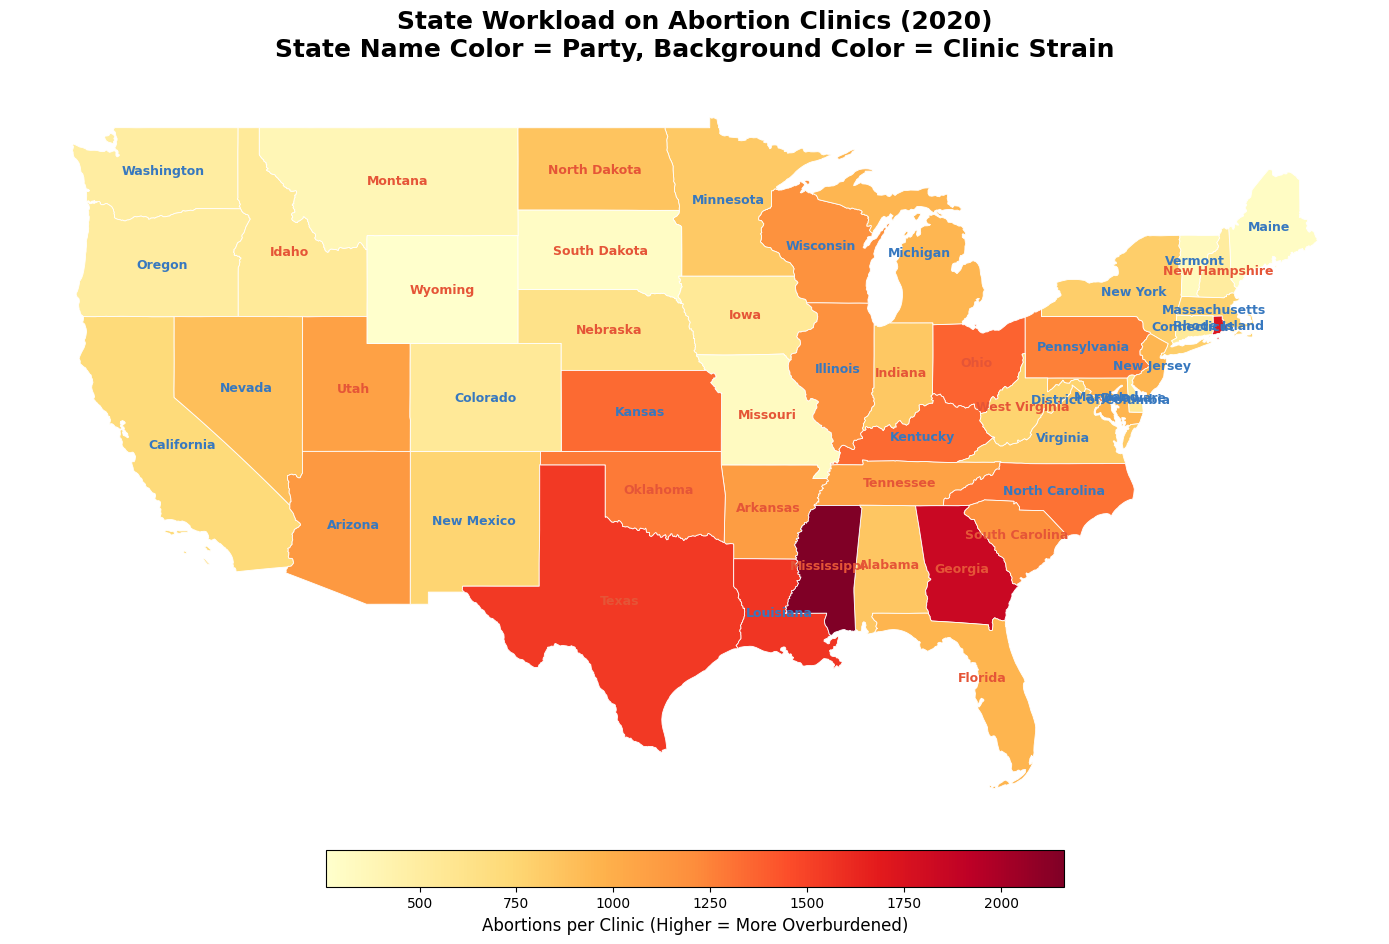

In [246]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load shapefile
shapefile_path = "/Users/evelynzhang/Documents/GitHub/portfolio/project2/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
states = gpd.read_file(shapefile_path)

# 2. Merge with your abortion_df
# Assume abortion_df has columns: 'State', 'Abortions_per_Clinic', 'Party_Control'
states = states.merge(abortion_df, left_on='NAME', right_on='State')

# 3. Clean up (optional: remove AK, HI, PR)
states = states[~states['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# 4. Set up party colors
party_colors = {'Democratic': '#3778bf', 'Republican': '#e55537'}

# 5. Set up color map for background
cmap = plt.cm.YlOrRd  # Yellow to Red (danger gradient)

# Normalize abortions per clinic for color intensity
norm = plt.Normalize(
    vmin=states['Abortions_per_Clinic'].quantile(0.1),   # 10th percentile
    vmax=states['Abortions_per_Clinic'].quantile(0.9)    # 90th percentile
)

# 6. Plot
fig, ax = plt.subplots(figsize=(14, 10))

# Background: states shaded by abortions per clinic
states.plot(
    ax=ax,
    column='Abortions_per_Clinic',
    cmap=cmap,
    edgecolor='white',
    linewidth=0.6
)

# Overlay: State names colored by party
for idx, row in states.iterrows():
    centroid = row['geometry'].centroid
    party = row['Party_Control']
    ax.text(
        centroid.x, centroid.y,
        row['NAME'],
        color=party_colors.get(party, 'gray'),
        fontsize=9,
        ha='center',
        va='center',
        fontweight='bold'
    )

# Title and labels
ax.set_title(
    "State Workload on Abortion Clinics (2020)\nState Name Color = Party, Background Color = Clinic Strain",
    fontsize=18, fontweight='bold', pad=20
)

# Colorbar for workload
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.04, pad=0.03)
cbar.set_label('Abortions per Clinic (Higher = More Overburdened)', fontsize=12)

# Clean axes
ax.axis('off')
plt.tight_layout()
plt.show()


In [256]:
abortion_df.columns

Index(['State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in the no.

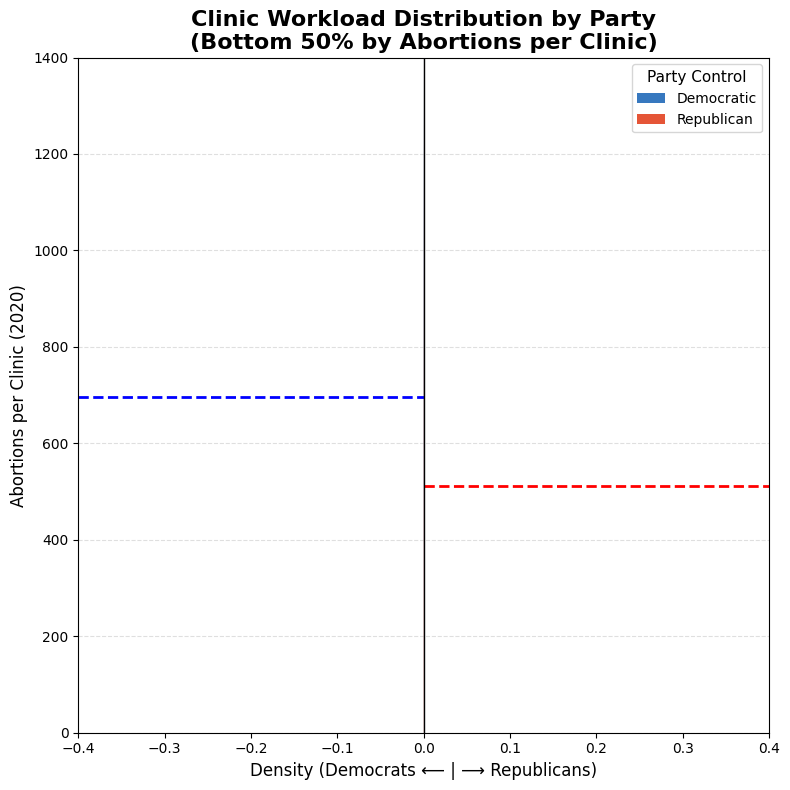

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch

# Prepare your data
abortion = abortion_df.copy()
df['Abortions_per_Clinic'] = df['Abortions_2020'] / df['Clinic_Count']
df = df.dropna(subset=['Party_Control'])

# Bottom 50% function
def bottom_half(group):
    return group.nsmallest(len(group)//2, 'Abortions_per_Clinic')

# Group and bottom 50%
bottom_50 = (
    df.groupby('Party_Control', group_keys=False)
    .apply(bottom_half, include_groups=False)
)

# Restore Party_Control after apply
bottom_50['Party_Control'] = df.set_index('State').loc[bottom_50['State']]['Party_Control'].values

# Split into groups
dem_data = bottom_50[bottom_50['Party_Control'] == 'Democratic']['Abortions_per_Clinic']
rep_data = bottom_50[bottom_50['Party_Control'] == 'Republican']['Abortions_per_Clinic']

# KDEs
kde_dem = gaussian_kde(dem_data)
kde_rep = gaussian_kde(rep_data)

# Y-axis values (Abortions per Clinic)
x = np.linspace(0, 1400, 300)

# Density computations
dem_density = kde_dem(x)
rep_density = kde_rep(x)

# 🛠 Normalize densities to max, then rescale to fill horizontally
max_density = max(dem_density.max(), rep_density.max())
dem_density = dem_density / max_density * 0.4  # 40% width
rep_density = rep_density / max_density * 0.4

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Democratic side (left, blue)
ax.fill_betweenx(
    x, 
    -dem_density, 
    np.zeros_like(x), 
    facecolor='#3778bf', 
    alpha=0.7
)

# Republican side (right, red)
ax.fill_betweenx(
    x, 
    np.zeros_like(x), 
    rep_density, 
    facecolor='#e55537', 
    alpha=0.7
)

# Median lines
ax.hlines(np.median(dem_data), xmin=-0.4, xmax=0, color='blue', linestyle='--', lw=2)
ax.hlines(np.median(rep_data), xmin=0, xmax=0.4, color='red', linestyle='--', lw=2)

# Manual Legend
handles = [
    Patch(facecolor='#3778bf', label='Democratic'),
    Patch(facecolor='#e55537', label='Republican')
]
ax.legend(handles=handles, loc='upper right', title="Party Control", fontsize=10, title_fontsize=11)

# Styling
ax.set_ylim(0, 1400)
ax.set_xlim(-0.4, 0.4)
ax.set_xlabel('Density (Democrats ⟵ | ⟶ Republicans)', fontsize=12)
ax.set_ylabel('Abortions per Clinic (2020)', fontsize=12)
ax.set_title('Clinic Workload Distribution by Party\n(Bottom 50% by Abortions per Clinic)', fontsize=16, fontweight='bold')
ax.axvline(0, color='black', lw=1)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()




In [163]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

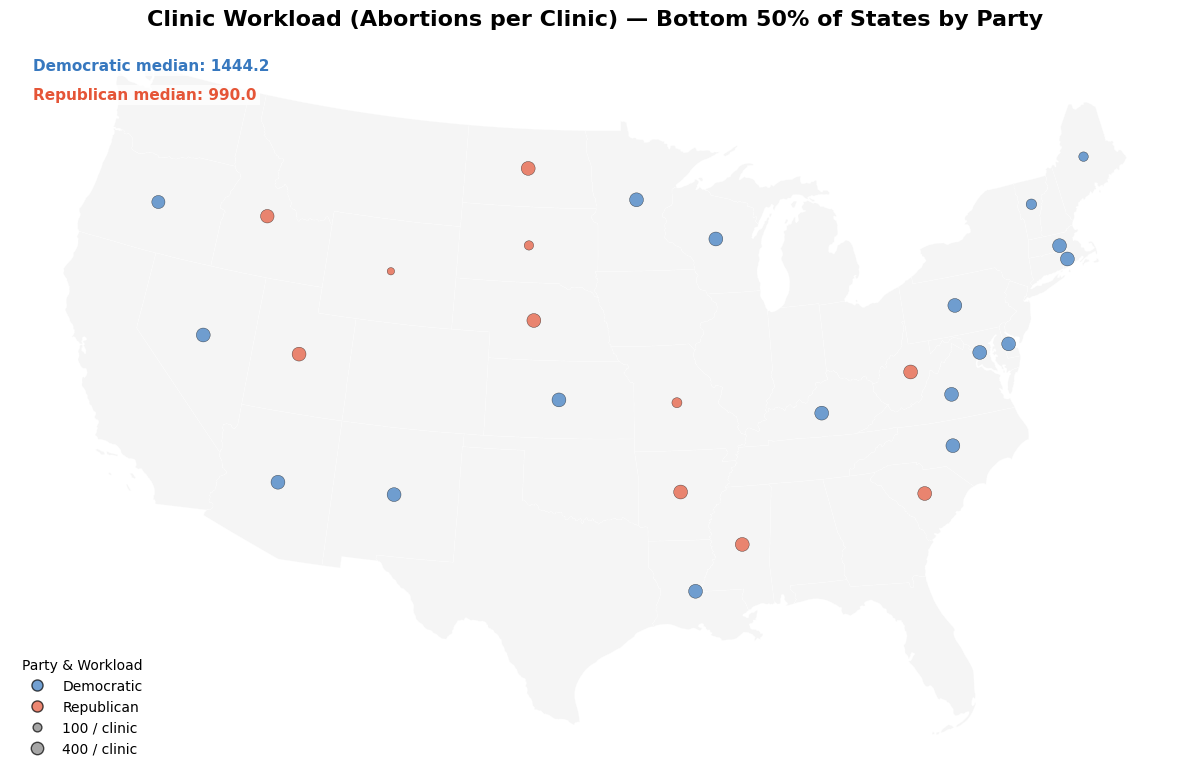

In [234]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# 1) Load shapefile and abortion metrics
shp_path = "/Users/evelynzhang/Documents/GitHub/portfolio/project2/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
states = gpd.read_file(shp_path)

# 2) Merge and filter
states = states.merge(abortion_df, left_on="NAME", right_on="State")
states = states[~states["NAME"].isin(["Alaska","Hawaii","Puerto Rico"])  ]

# 3) Select bottom 50% by clinic count within each party
groups = states.groupby("Party_Control")["Clinic_Count"].median().to_dict()
mask = states.apply(lambda r: r["Clinic_Count"] <= groups[r["Party_Control"]], axis=1)
subset = states[mask].copy()

# 4) Reproject and compute centroids
albers = "EPSG:5070"
states = states.to_crs(albers)
subset = subset.to_crs(albers)
subset["centroid"] = subset.geometry.centroid
centroids = subset.set_geometry("centroid")

# 5) Define size mapping and colors
size_map = lambda x: np.clip(np.sqrt(x) * 4, 5, 100)
centroids["size"] = centroids["Abortions_per_Clinic"].map(size_map)
party_colors = {"Democratic":"#3778bf","Republican":"#e55537"}

# 6) Plot single combined bubble map
fig, ax = plt.subplots(figsize=(12, 8))
# base map
states.plot(ax=ax, color="#f5f5f5", edgecolor="#ffffffaa", linewidth=0.3)
# plot bubbles by party
for party, color in party_colors.items():
    part = centroids[centroids["Party_Control"] == party]
    part.plot(
        ax=ax,
        markersize=part["size"],
        color=color,
        alpha=0.7,
        edgecolor="k",
        linewidth=0.3,
        label=party
    )

# 7) Annotate medians
for i, (party, color) in enumerate(party_colors.items()):
    med = centroids[centroids["Party_Control"] == party]["Abortions_per_Clinic"].median().round(1)
    ax.text(
        0.02, 0.95 - i * 0.04,
        f"{party} median: {med}",
        transform=ax.transAxes,
        fontsize=11,
        fontweight="semibold",
        color=color,
        bbox=dict(facecolor="white", alpha=0.7, pad=2, edgecolor="none")
    )

# 8) Build legend for party and workload sizes
# party legend
party_handles = [Line2D([], [], marker='o', color=c, linestyle='', label=p, markersize=8, alpha=0.7, markeredgecolor='k')
                 for p, c in party_colors.items()]
# size legend
size_vals = [100, 400]
size_handles = [Line2D([], [], marker='o', color='gray', linestyle='',
                       label=f"{v} / clinic", markersize=np.sqrt(size_map(v)), alpha=0.7, markeredgecolor='k')
                for v in size_vals]

ax.legend(handles=party_handles + size_handles,
          title="Party & Workload", loc="lower left", frameon=False)

# 9) Final styling
ax.set_title(
    "Clinic Workload (Abortions per Clinic) — Bottom 50% of States by Party",
    fontsize=16, fontweight="bold"
)
ax.axis('off')
plt.tight_layout()
plt.show()


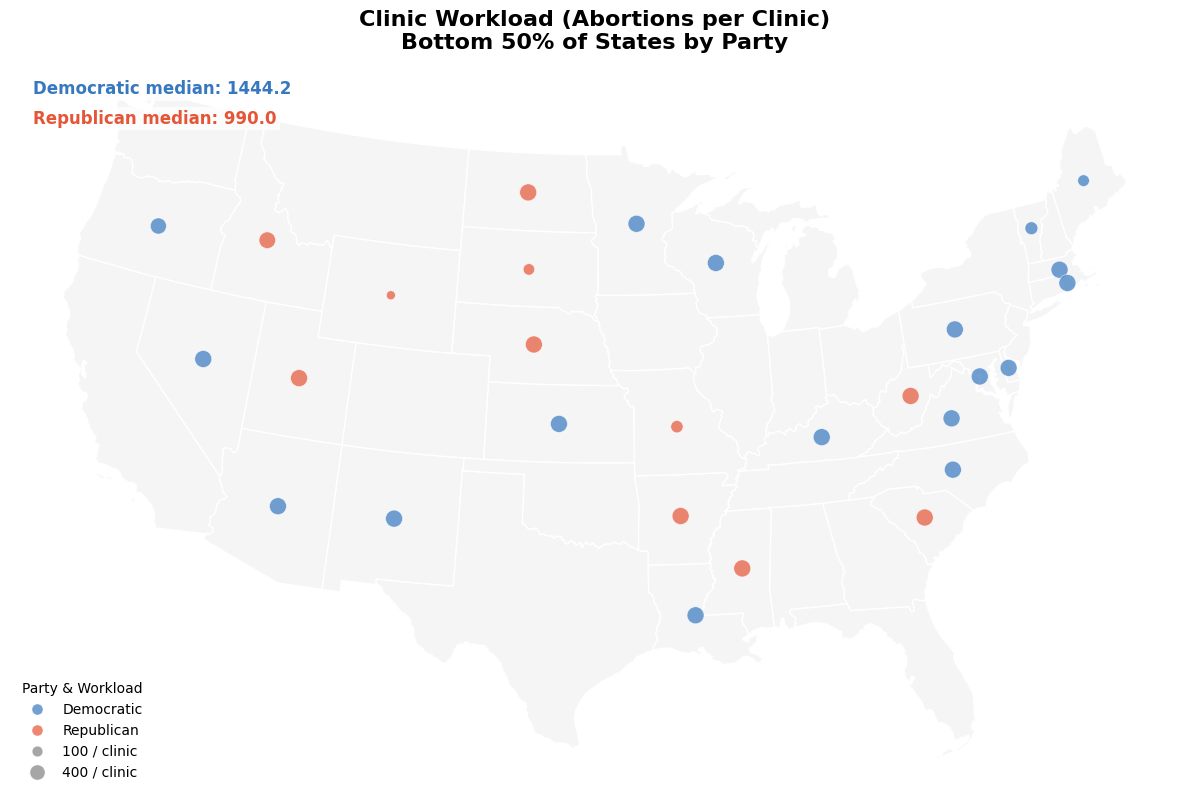

In [236]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# 1) Load shapefile and data
shp_path = "/Users/evelynzhang/Documents/GitHub/portfolio/project2/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
states = gpd.read_file(shp_path)
# assume abortion_df already loaded as before

# 2) Merge & filter contiguous US
states = states.merge(abortion_df, left_on="NAME", right_on="State")
states = states[~states["NAME"].isin(["Alaska","Hawaii","Puerto Rico"])]

# 3) Bottom‐50% by clinic within each party
cutoffs = states.groupby("Party_Control")["Clinic_Count"].median().to_dict()
mask = states.apply(lambda r: r["Clinic_Count"] <= cutoffs[r["Party_Control"]], axis=1)
subset = states[mask].copy()

# 4) Reproject & centroids
states = states.to_crs("EPSG:5070")
subset = subset.to_crs(states.crs)
subset["centroid"] = subset.geometry.centroid
centroids = subset.set_geometry("centroid")

# 5) Bigger size mapping & colors
size_map = lambda x: np.clip(np.sqrt(x) * 6, 8, 150)   # increased from *4 → *6, clipped a bit higher
centroids["size"] = centroids["Abortions_per_Clinic"].map(size_map)
party_colors = {"Democratic":"#3778bf","Republican":"#e55537"}

# 6) Plot
fig, ax = plt.subplots(figsize=(12, 8))

# — draw state polygons with solid white borders
states.plot(
    ax=ax,
    facecolor="#f5f5f5",
    edgecolor="white",
    linewidth=1.0
)

# — plot bubbles
for party, color in party_colors.items():
    part = centroids[centroids["Party_Control"] == party]
    part.plot(
        ax=ax,
        markersize=part["size"],
        color=color,
        alpha=0.7,
        edgecolor="white",
        linewidth=0.5,
        label=party
    )

# 7) Medians annotation
for i,(party,color) in enumerate(party_colors.items()):
    med = centroids[centroids["Party_Control"]==party]["Abortions_per_Clinic"].median().round(1)
    ax.text(
        0.02, 0.95 - i*0.04, f"{party} median: {med}",
        transform=ax.transAxes, fontsize=12, fontweight="semibold", color=color,
        bbox=dict(facecolor="white", alpha=0.7, pad=2, edgecolor="none")
    )

# 8) Legend
party_handles = [
    Line2D([],[],marker='o', color=c, linestyle='', label=p,
           markersize=8, alpha=0.7, markeredgecolor='white', markeredgewidth=0.5)
    for p,c in party_colors.items()
]
size_vals = [100,400]
size_handles = [
    Line2D([],[],marker='o', color='gray', linestyle='',
           label=f"{v} / clinic", markersize=np.sqrt(size_map(v)),
           alpha=0.7, markeredgecolor='white', markeredgewidth=0.5)
    for v in size_vals
]
ax.legend(handles=party_handles+size_handles, title="Party & Workload",
          loc="lower left", frameon=False)

# 9) Final styling
ax.set_title(
    "Clinic Workload (Abortions per Clinic)\nBottom 50% of States by Party",
    fontsize=16, fontweight="bold"
)
ax.axis('off')
plt.tight_layout()
plt.show()


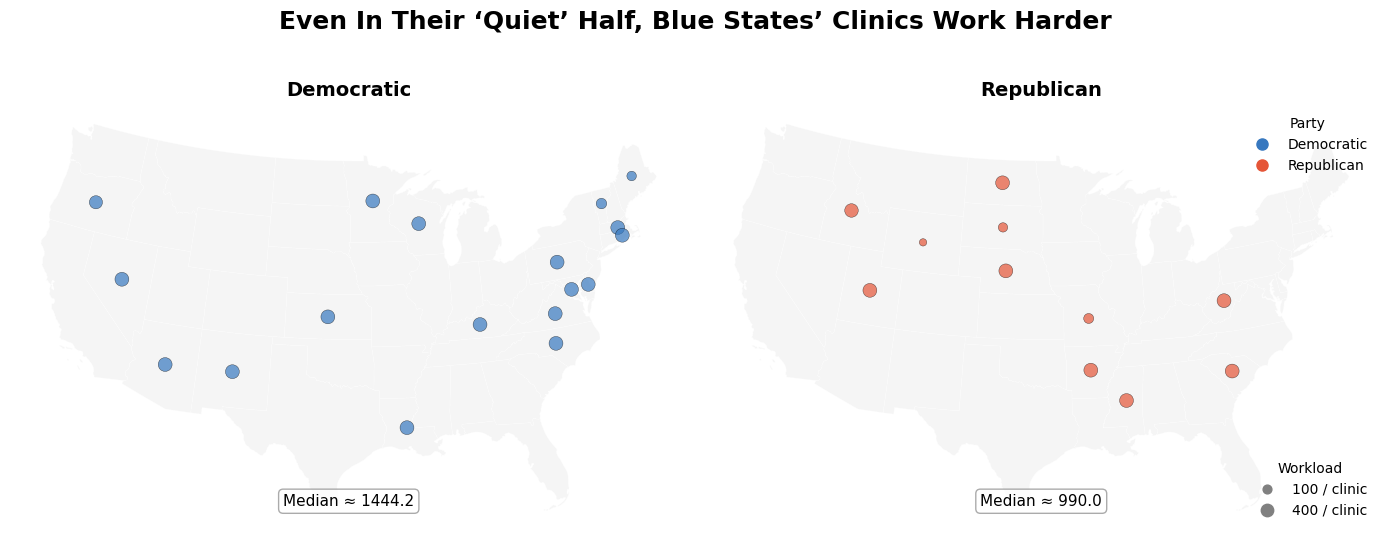

In [233]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load shapefile & data
shp = "/Users/evelynzhang/Documents/GitHub/portfolio/project2/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
states = gpd.read_file(shp)

# 2) Merge    
states = states.merge(abortion_df, left_on="NAME", right_on="State")

# 3) Drop non-contiguous
states = states[~states["NAME"].isin(["Alaska","Hawaii","Puerto Rico"])]

# 4) Compute bottom-50% cutoff per party
cutoffs = states.groupby("Party_Control")["Clinic_Count"].median().to_dict()
mask = states.apply(
    lambda r: r["Clinic_Count"] <= cutoffs[r["Party_Control"]], axis=1
)
subset = states[mask]

# 5) Reproject & centroids
states = states.to_crs("EPSG:5070")      # Albers USA
subset = subset.to_crs(states.crs)
subset["centroid"] = subset.geometry.centroid
subset = subset.set_geometry("centroid")

# 6) Precompute sizes & colors
import numpy as np
from matplotlib.lines import Line2D

size_map = lambda x: np.clip((x**0.5)*4, 5, 100)
party_colors = {"Democratic":"#3778bf","Republican":"#e55537"}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw=dict(aspect="equal"))
plt.suptitle(
    "Even In Their ‘Quiet’ Half, Blue States’ Clinics Work Harder",
    fontsize=18, fontweight="bold", y=0.98
)

for ax, party in zip(axes, ["Democratic","Republican"]):
    # base
    states.plot(ax=ax, color="#f5f5f5", edgecolor="#ffffffaa", linewidth=0.3)
    # bubbles
    part = subset[subset["Party_Control"]==party]
    part.plot(
        ax=ax,
        markersize=part["Abortions_per_Clinic"].map(size_map),
        color=party_colors[party], alpha=0.7,
        edgecolor="k", linewidth=0.3
    )
    # title & median
    ax.set_title(party, fontsize=14, fontweight="semibold", pad=6)
    med = part["Abortions_per_Clinic"].median().round(1)
    ax.text(
        0.5, 0.05, f"Median ≈ {med}",
        transform=ax.transAxes, ha="center", va="bottom",
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#888", alpha=0.7)
    )
    # grid
    ax.set_axis_on()
    ax.grid(color="#cccccc", linestyle="--", linewidth=0.3, alpha=0.3)
    ax.axis("off")

# legends
color_handles = [Line2D([],[],marker="o",linestyle="", color=c, label=p, markersize=8)
                 for p,c in party_colors.items()]
size_handles = [
    Line2D([],[],marker="o", linestyle="", color="gray",
           markersize=np.sqrt(size_map(v)), label=f"{v} / clinic")
    for v in [100, 400]
]

leg1 = axes[1].legend(handles=color_handles, title="Party", loc="upper right", frameon=False)
leg2 = axes[1].legend(handles=size_handles, title="Workload", loc="lower right", frameon=False)
axes[1].add_artist(leg1)

plt.tight_layout()
plt.show()


/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_32975/32850959.py:90: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



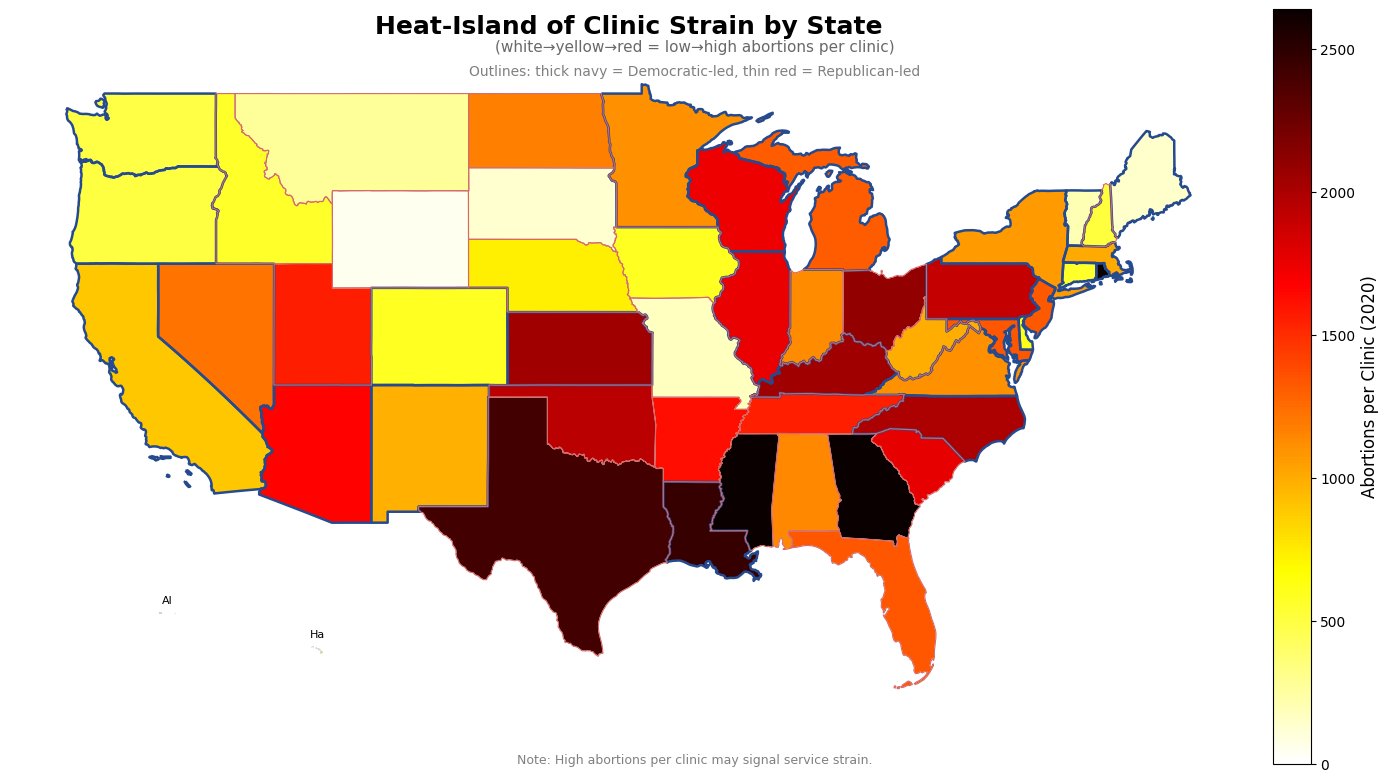

In [221]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load cleaned abortion_df (with State, Abortions_per_Clinic, Party_Control)
# assume abortion_df already in memory from previous preprocessing

# 1) Read US states shapefile
shp = "/Users/evelynzhang/Documents/GitHub/portfolio/project2/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
states = gpd.read_file(shp)[['NAME','geometry']].rename(columns={'NAME':'State'})

# 2) Merge geodata with abortion workload metric
merged = states.merge(
    abortion_df[['State','Abortions_per_Clinic','Party_Control']],
    on='State', how='left'
)

# 3) Drop AK & HI for main map
contig = merged[~merged['State'].isin(['Alaska','Hawaii'])]

# 4) Set up figure
fig, ax = plt.subplots(figsize=(14,8))

# 5) Heat-island choropleth
vmax = contig['Abortions_per_Clinic'].quantile(0.95)
contig.plot(
    column='Abortions_per_Clinic',
    cmap='hot_r',
    vmin=0,
    vmax=vmax,
    linewidth=0.5,
    edgecolor='white',
    ax=ax
)

# 6) Overlay party-stroke outlines
contig[contig['Party_Control']=='Democratic'].boundary.plot(
    ax=ax, edgecolor='#264a8e', linewidth=1.8
)
contig[contig['Party_Control']=='Republican'].boundary.plot(
    ax=ax, edgecolor='#d46a6a', linewidth=0.8
)

# 7) Alaska & Hawaii insets
for state, bbox in [('Alaska',(0.02,0.02,0.12,0.16)), ('Hawaii',(0.16,0.02,0.10,0.10))]:
    axins = inset_axes(
        ax, width="12%", height="12%",
        bbox_to_anchor=bbox, bbox_transform=ax.transAxes
    )
    row = merged[merged['State']==state]
    row.plot(
        column='Abortions_per_Clinic', cmap='hot_r', vmin=0, vmax=vmax,
        linewidth=0.5, edgecolor='lightgray', ax=axins
    )
    axins.set_title(state[:2], fontsize=8)
    axins.axis('off')

# 8) Colorbar
sm = plt.cm.ScalarMappable(
    cmap='hot_r', norm=plt.Normalize(vmin=0, vmax=vmax)
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.ax.set_ylabel('Abortions per Clinic (2020)', fontsize=12)

# 9) Titles, subtitles, and notes
ax.set_title(
    'Heat‑Island of Clinic Strain by State',
    fontsize=18, weight='bold', pad=15
)
fig.text(
    0.5, 0.92,
    '(white→yellow→red = low→high abortions per clinic)',
    ha='center', fontsize=11, color='dimgray'
)
fig.text(
    0.5, 0.89,
    'Outlines: thick navy = Democratic‑led, thin red = Republican‑led',
    ha='center', fontsize=10, color='gray'
)
fig.text(
    0.5, 0.03,
    'Note: High abortions per clinic may signal service strain.',
    ha='center', fontsize=9, color='gray'
)

# 10) Clean up
ax.axis('off')
plt.tight_layout()
plt.show()


/Users/evelynzhang/Library/Python/3.12/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_32975/1437896706.py:60: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



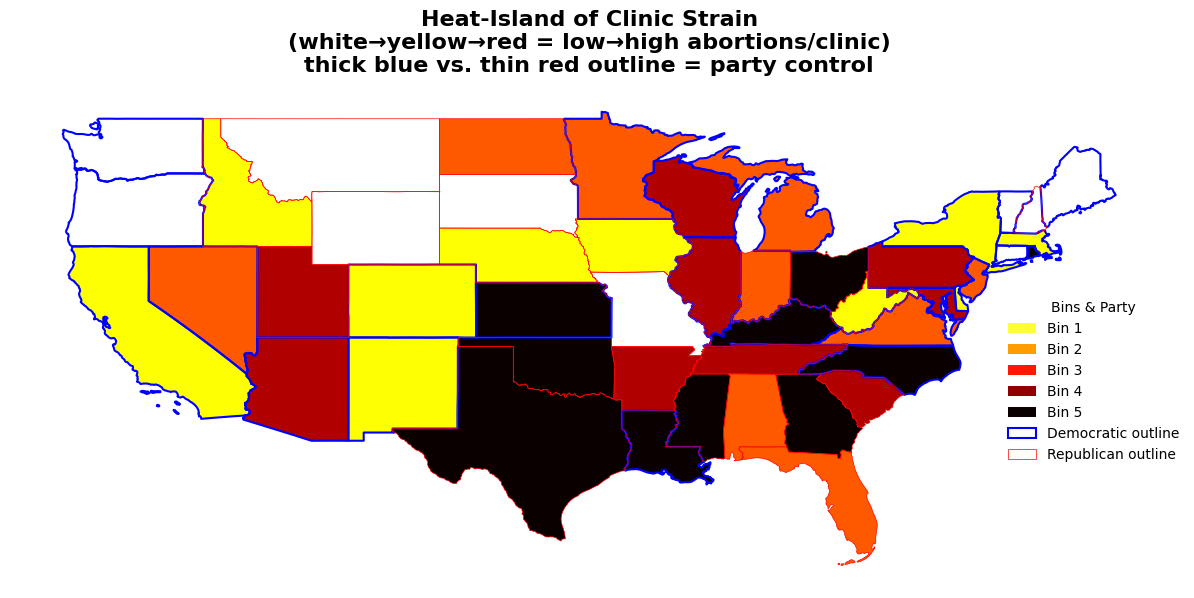

In [217]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1) load and prep
ab = abortion_df.rename(columns={
    'State':'State',
    'Abortions_2020':'Abortions_2020',
    'Clinic_Count':'Clinic_Count',
})
ab['Abortions_per_Clinic'] = ab['Abortions_2020'] / ab['Clinic_Count']

# 2) shapefile
shp = "/Users/evelynzhang/Documents/GitHub/portfolio/project2/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
states = gpd.read_file(shp)[['NAME','geometry']]
states = states.rename(columns={'NAME':'State'})

# 3) merge & drop AK/HI
merged = states.merge(ab[['State','Abortions_per_Clinic','Party_Control']],
                      on='State', how='left')
contig = merged[~merged['State'].isin(['Alaska','Hawaii'])]

# 4) quantile‐bin ourselves
contig['strain_bin'] = pd.qcut(contig['Abortions_per_Clinic'], 
                               q=5, 
                               labels=[1,2,3,4,5])

# 5) plot
fig, ax = plt.subplots(1,1, figsize=(12,6))
# base chloropleth:
contig.plot(
    column='strain_bin',
    categorical=True,
    cmap='hot_r',
    legend=False,
    linewidth=0,
    ax=ax
)

# overlay party outlines
for party,color,lw in [
    ('Democratic','blue',1.5),
    ('Republican','red',0.5)
]:
    contig[contig['Party_Control']==party]\
        .boundary.plot(ax=ax, edgecolor=color, linewidth=lw)

ax.set_aspect('equal')
ax.axis('off')
ax.set_title(
    "Heat-Island of Clinic Strain\n"
    "(white→yellow→red = low→high abortions/clinic)\n"
    "thick blue vs. thin red outline = party control",
    fontsize=16, weight='bold', pad=12
)

# legend
patches = [
    Patch(facecolor=plt.cm.get_cmap('hot_r')(i/5), label=f'Bin {i}') 
    for i in range(1,6)
] + [
    Patch(edgecolor='blue', facecolor='none', lw=1.5, label='Democratic outline'),
    Patch(edgecolor='red',  facecolor='none', lw=0.5, label='Republican outline'),
]
ax.legend(handles=patches, bbox_to_anchor=(1.02,0.6), 
          title="Bins & Party", fontsize=10, frameon=False)

plt.tight_layout()
plt.show()


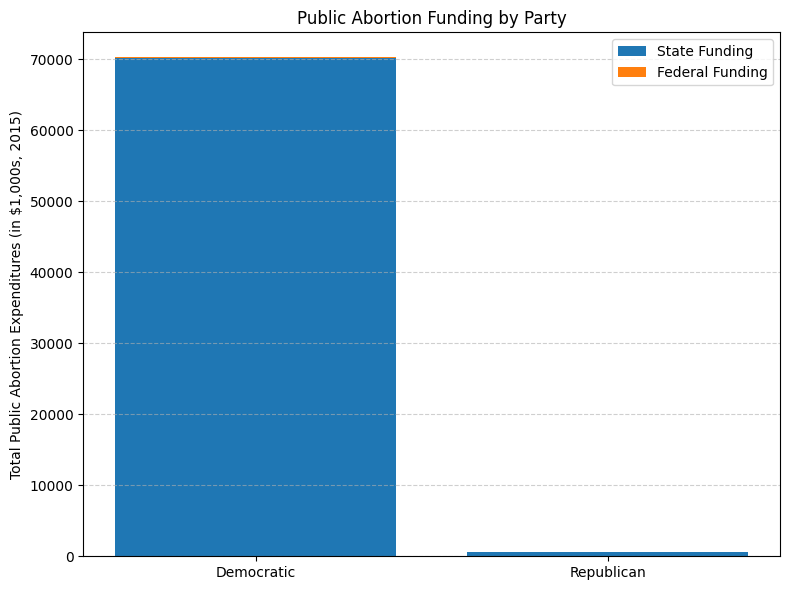

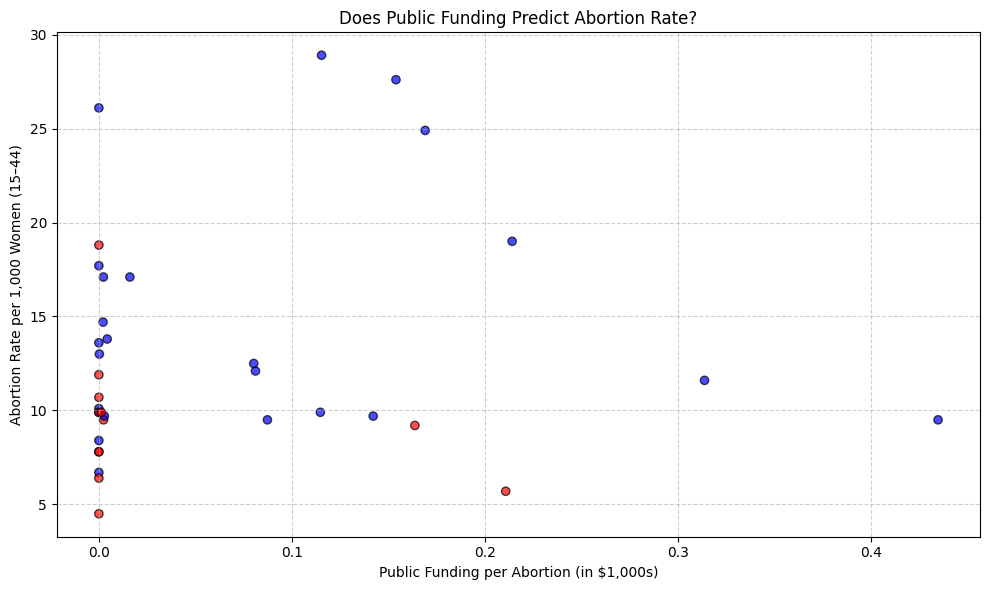

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter and clean relevant columns
df_funding = df.copy()
df_funding = df_funding.dropna(subset=[
    'Reported public expenditures for abortions (in 000s of dollars), state, 2015',
    'Reported public expenditures for abortions (in 000s of dollars), federal, 2015',
    'No. of abortions, by state of residence, 2020',
    'Party'
])

# Convert columns to numeric
df_funding['state_funding'] = pd.to_numeric(df_funding['Reported public expenditures for abortions (in 000s of dollars), state, 2015'], errors='coerce')
df_funding['federal_funding'] = pd.to_numeric(df_funding['Reported public expenditures for abortions (in 000s of dollars), federal, 2015'], errors='coerce')
df_funding['total_abortions'] = pd.to_numeric(df_funding['No. of abortions, by state of residence, 2020'], errors='coerce')

# Normalize: funding per abortion (in thousands of dollars)
df_funding['funding_per_abortion'] = (df_funding['state_funding'] + df_funding['federal_funding']) / df_funding['total_abortions']

# --- Plot 1: Stacked bar chart of federal vs. state funding by Party (summed) ---
grouped = df_funding.groupby('Party')[['state_funding', 'federal_funding']].sum()

plt.figure(figsize=(8, 6))
bar1 = plt.bar(grouped.index, grouped['state_funding'], label='State Funding')
bar2 = plt.bar(grouped.index, grouped['federal_funding'], bottom=grouped['state_funding'], label='Federal Funding')

plt.ylabel("Total Public Abortion Expenditures (in $1,000s, 2015)")
plt.title("Public Abortion Funding by Party")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Scatter plot of funding per abortion vs. abortion rate ---
df_funding = df_funding.dropna(subset=['funding_per_abortion', 'No. of abortions per 1,000 women aged 15–44, by state of residence, 2020'])
x = df_funding['funding_per_abortion']
y = df_funding['No. of abortions per 1,000 women aged 15–44, by state of residence, 2020']
colors = df_funding['Party'].map({'Democratic': 'blue', 'Republican': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, edgecolor='black', alpha=0.7)
plt.xlabel("Public Funding per Abortion (in $1,000s)")
plt.ylabel("Abortion Rate per 1,000 Women (15–44)")
plt.title("Does Public Funding Predict Abortion Rate?")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



NameError: name 'Line2D' is not defined

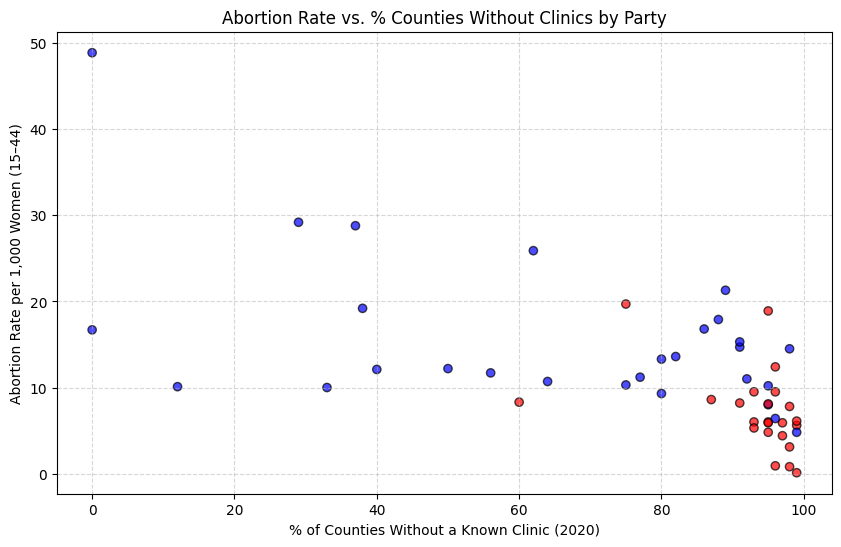

In [96]:
# Filter necessary columns and drop missing values
cols = [
    'U.S. State',
    '% of counties without a known clinic, 2020',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020',
    'Party'
]
df_scatter = df[cols].dropna()

# Rename for convenience
df_scatter.columns = ['State', 'Pct_No_Clinics', 'Abortion_Rate_15_44', 'Party']

# Plot
plt.figure(figsize=(10, 6))
colors = df_scatter['Party'].map({'Democratic': 'blue', 'Republican': 'red'})

plt.scatter(df_scatter['Pct_No_Clinics'], df_scatter['Abortion_Rate_15_44'],
            c=colors, edgecolor='black', alpha=0.7)

plt.xlabel('% of Counties Without a Known Clinic (2020)')
plt.ylabel('Abortion Rate per 1,000 Women (15–44)')
plt.title('Abortion Rate vs. % Counties Without Clinics by Party')
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Democratic', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Republican', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()



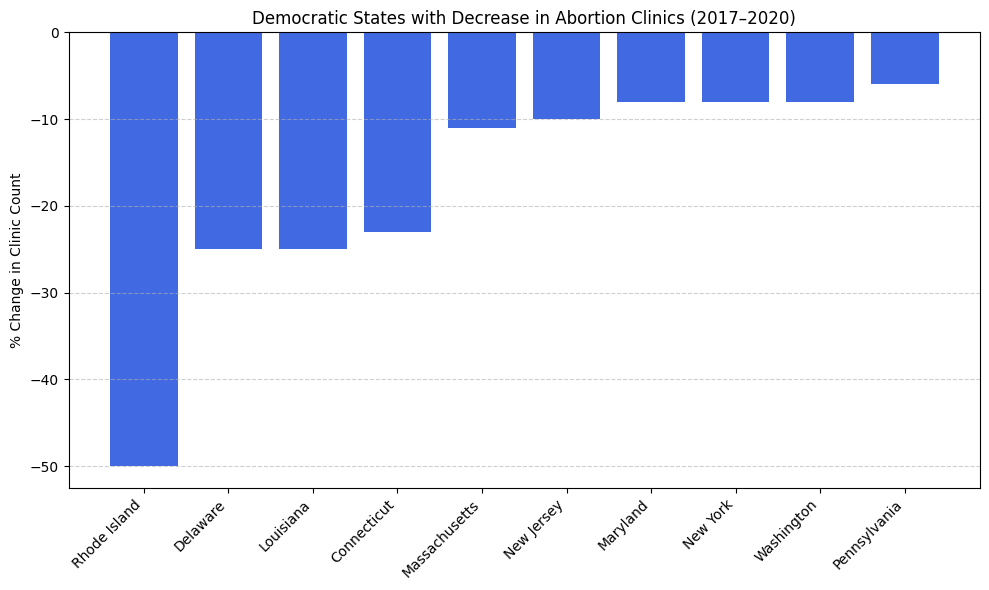

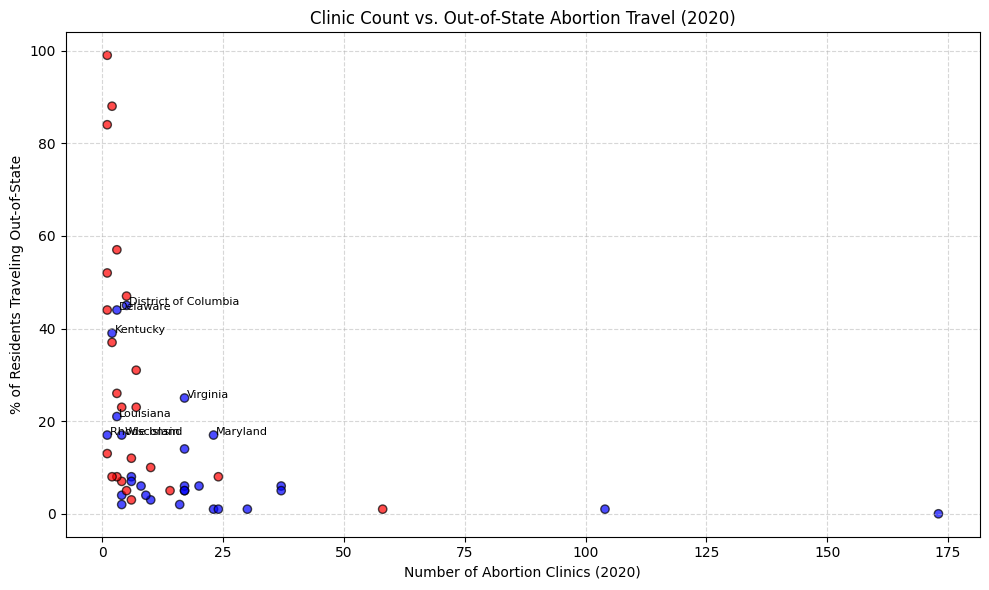

In [97]:
df_filtered = df.copy()
df_filtered = df_filtered.dropna(subset=[
    '% change in the no. of abortion clinics, 2017-2020',
    '% of residents obtaining abortions who traveled out of state for care, 2020',
    'No. of abortion clinics, 2020',
    'Party',
    'U.S. State'
])

# Convert columns to numeric
df_filtered['% change in the no. of abortion clinics, 2017-2020'] = pd.to_numeric(
    df_filtered['% change in the no. of abortion clinics, 2017-2020'], errors='coerce')
df_filtered['% of residents obtaining abortions who traveled out of state for care, 2020'] = pd.to_numeric(
    df_filtered['% of residents obtaining abortions who traveled out of state for care, 2020'], errors='coerce')
df_filtered['No. of abortion clinics, 2020'] = pd.to_numeric(
    df_filtered['No. of abortion clinics, 2020'], errors='coerce')

# 1. Bar chart of Democratic states with clinic declines
decline_demo = df_filtered[(df_filtered['Party'] == 'Democratic') &
                           (df_filtered['% change in the no. of abortion clinics, 2017-2020'] < 0)]
decline_demo_sorted = decline_demo.sort_values('% change in the no. of abortion clinics, 2017-2020')

plt.figure(figsize=(10, 6))
plt.bar(decline_demo_sorted['U.S. State'],
        decline_demo_sorted['% change in the no. of abortion clinics, 2017-2020'],
        color='royalblue')
plt.title("Democratic States with Decrease in Abortion Clinics (2017–2020)")
plt.ylabel("% Change in Clinic Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Scatter plot of clinic count vs. % traveling out of state, highlighting blue states
plt.figure(figsize=(10, 6))

colors = df_filtered['Party'].map({'Democratic': 'blue', 'Republican': 'red'})
plt.scatter(df_filtered['No. of abortion clinics, 2020'],
            df_filtered['% of residents obtaining abortions who traveled out of state for care, 2020'],
            c=colors, edgecolor='black', alpha=0.7)

for _, row in df_filtered.iterrows():
    if row['Party'] == 'Democratic' and row['% of residents obtaining abortions who traveled out of state for care, 2020'] > 15:
        plt.text(row['No. of abortion clinics, 2020'] + 0.5,
                 row['% of residents obtaining abortions who traveled out of state for care, 2020'],
                 row['U.S. State'], fontsize=8)

plt.title("Clinic Count vs. Out-of-State Abortion Travel (2020)")
plt.xlabel("Number of Abortion Clinics (2020)")
plt.ylabel("% of Residents Traveling Out-of-State")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


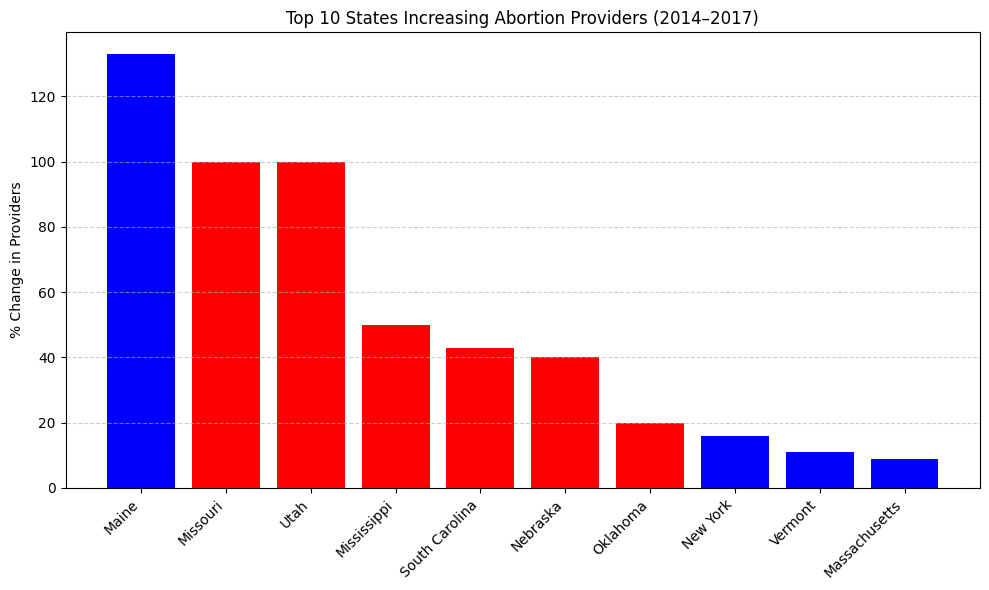

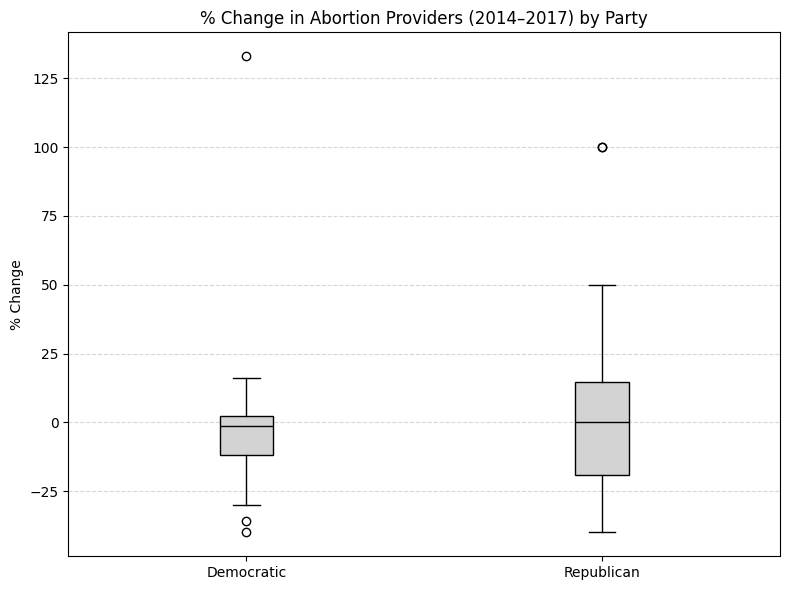

In [103]:
import pandas as pd
import matplotlib.pyplot as plt



# Clean and filter relevant column
col = '% change in the no. of abortion providers, 2014-2017'
df_providers = df.dropna(subset=[col, 'Party', 'U.S. State'])
df_providers[col] = pd.to_numeric(df_providers[col], errors='coerce')

# --- Plot 1: Top states with increase in providers grouped by Party ---
top_increases = df_providers[df_providers[col] > 0].sort_values(col, ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_increases['U.S. State'], top_increases[col],
               color=top_increases['Party'].map({'Democratic': 'blue', 'Republican': 'red'}))
plt.title("Top 10 States Increasing Abortion Providers (2014–2017)")
plt.ylabel("% Change in Providers")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Boxplot of % change in providers by Party ---
plt.figure(figsize=(8, 6))

parties = ['Democratic', 'Republican']
data = [df_providers[df_providers['Party'] == party][col] for party in parties]
plt.boxplot(data, labels=parties, patch_artist=True,
            boxprops=dict(facecolor='lightgray'),
            medianprops=dict(color='black'))

plt.title("% Change in Abortion Providers (2014–2017) by Party")
plt.ylabel("% Change")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


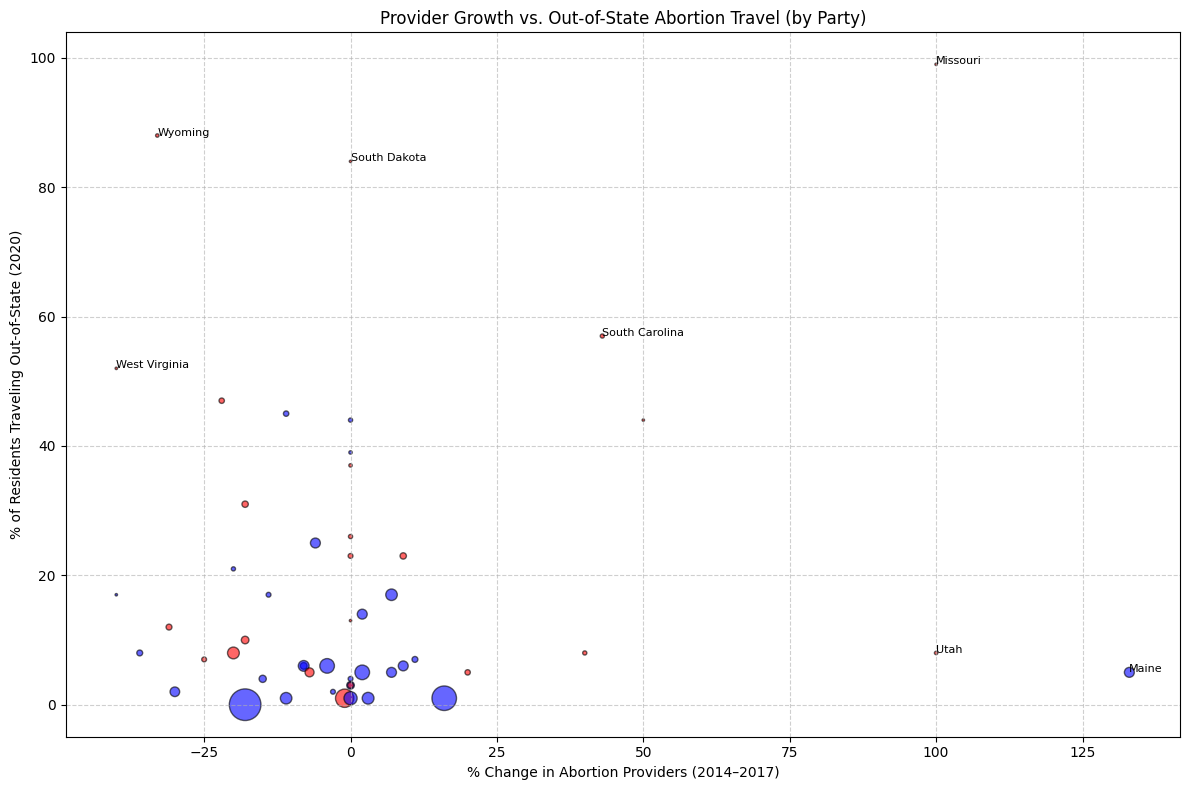

In [104]:
import matplotlib.pyplot as plt

# Filter necessary columns and drop missing values
df_bubble = df[[
    'U.S. State',
    'Party',
    '% change in the no. of abortion providers, 2014-2017',
    '% of residents obtaining abortions who traveled out of state for care, 2020',
    'No. of abortion clinics, 2020'
]].dropna()

# Map colors by party
party_colors = {'Democratic': 'blue', 'Republican': 'red'}
colors = df_bubble['Party'].map(party_colors)

# Bubble chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_bubble['% change in the no. of abortion providers, 2014-2017'],
    df_bubble['% of residents obtaining abortions who traveled out of state for care, 2020'],
    s=df_bubble['No. of abortion clinics, 2020'] * 3,
    c=colors,
    alpha=0.6,
    edgecolor='black'
)

# Labels for selected outliers
for _, row in df_bubble.iterrows():
    if abs(row['% change in the no. of abortion providers, 2014-2017']) > 75 or row['% of residents obtaining abortions who traveled out of state for care, 2020'] > 50:
        plt.text(row['% change in the no. of abortion providers, 2014-2017'],
                 row['% of residents obtaining abortions who traveled out of state for care, 2020'],
                 row['U.S. State'], fontsize=8)

plt.title("Provider Growth vs. Out-of-State Abortion Travel (by Party)")
plt.xlabel("% Change in Abortion Providers (2014–2017)")
plt.ylabel("% of Residents Traveling Out-of-State (2020)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



/var/folders/vt/7gpyx6sd2jb26_2d8bcrh1740000gn/T/ipykernel_85812/759279951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FPro_class'] = df['FPro_class'].astype(int)


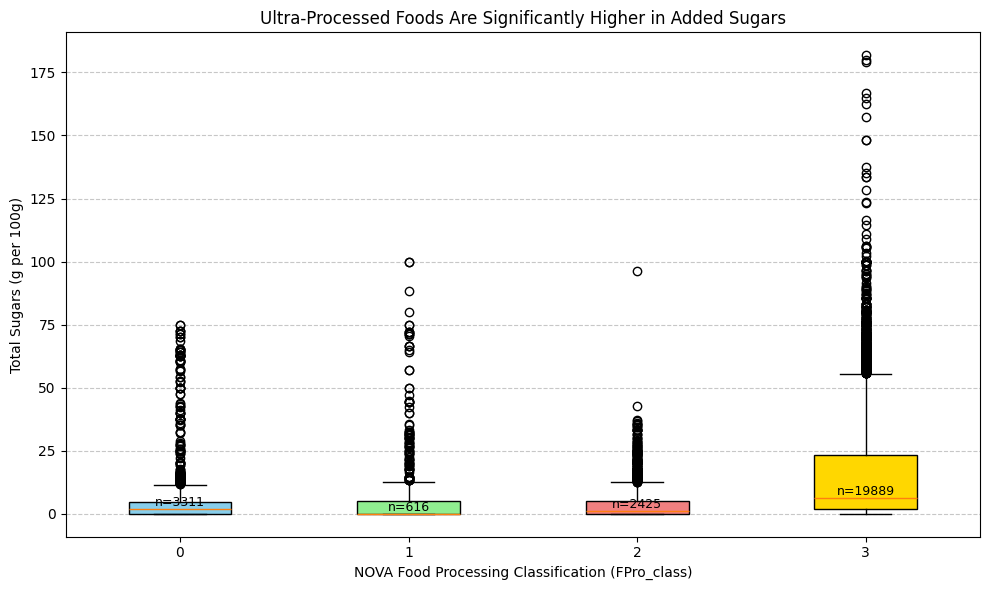

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


df = df.dropna(subset=['FPro_class', 'Sugars, total'])
df['FPro_class'] = df['FPro_class'].astype(int)

classes = sorted(df['FPro_class'].unique())
data_to_plot = [df[df['FPro_class'] == cls]['Sugars, total'] for cls in classes]
counts = [len(data) for data in data_to_plot]  # count of items per category

plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, labels=[str(cls) for cls in classes], patch_artist=True)

# Color each box
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Place the sample size (n=...) just above the median line of each box
for i, (median_line, count) in enumerate(zip(bp['medians'], counts)):
    # median_line.get_ydata() gives the y-coordinates of the median line
    median_y = median_line.get_ydata()[0]
    plt.text(i+1, median_y, f'n={count}', ha='center', va='bottom', fontsize=9)

plt.xlabel('NOVA Food Processing Classification (FPro_class)')
plt.ylabel('Total Sugars (g per 100g)')
plt.title('Ultra-Processed Foods Are Significantly Higher in Added Sugars')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
df['Sodium'].describe()


count     26241.000000
mean         21.752557
std        3381.014529
min           0.000000
25%           0.063380
50%           0.300000
75%           0.550000
max      547619.047600
Name: Sodium, dtype: float64

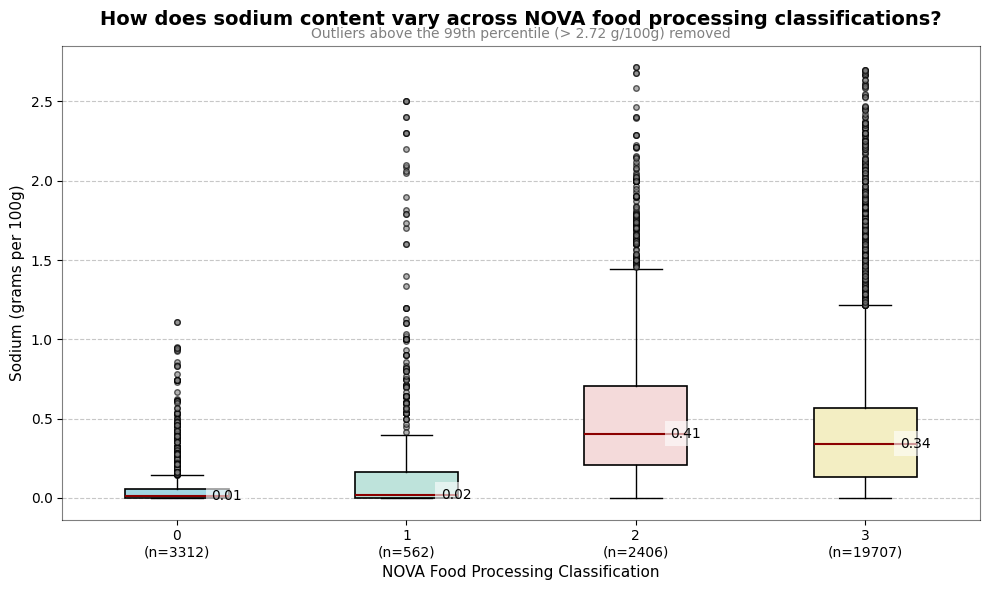

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data Transformations
# -----------------------------
# 1. Drop rows with missing values
df = df.dropna(subset=['FPro_class', 'Sodium'])

# 2. Convert FPro_class to int
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# 3. Filter out sodium outliers above the 99th percentile
upper_bound = df['Sodium'].quantile(0.99)
df_filtered = df[df['Sodium'] <= upper_bound]



# -----------------------------
# Prepare Data for Plotting
# -----------------------------
classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sodium'] for cls in classes]

# (Optional) Compute sample sizes for each class to show on x-axis labels
sample_sizes = [len(d) for d in data_to_plot]
x_labels = [f"{cls}\n(n={size})" for cls, size in zip(classes, sample_sizes)]

# -----------------------------
# Create Figure and Axes
# -----------------------------
plt.figure(figsize=(10, 6))

# Customize boxplot appearance
boxprops = dict(linewidth=1.2, edgecolor='black')
whiskerprops = dict(color='black', linewidth=1)
capprops = dict(color='black', linewidth=1)
medianprops = dict(color='darkred', linewidth=1.5)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.6)

bp = plt.boxplot(
    data_to_plot,
    labels=x_labels,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops
)

# Define a pastel color palette for the boxes
palette = ["#A1D6E2", "#BEE3DB", "#F4DADA", "#F3EEC3"]
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)

# -----------------------------
# Title, Subtitle, and Axes
# -----------------------------
plt.title(
    "How does sodium content vary across NOVA food processing classifications?",
    fontsize=14,
    weight='bold',
    pad=15  # Extra space below the title
)

# Add a smaller, lighter subtitle below the main title
# Using the same x-position as the title (centered) but a lower y-coordinate
plt.gca().text(
    0.5,              # x = 50% of the current axes width
    1.01,             # just below the title (adjust as needed)
    f"Outliers above the 99th percentile (> {upper_bound:.2f} g/100g) removed",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='gray',
    ha='center',
    va='bottom'
)

plt.xlabel("NOVA Food Processing Classification", fontsize=11)
plt.ylabel("Sodium (grams per 100g)", fontsize=11)

# Lighten the spines for a cleaner look
for spine in plt.gca().spines.values():
    spine.set_alpha(0.5)

# Add a subtle dashed grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# -----------------------------
# Add Median Labels on the Side
# -----------------------------
medians = [np.median(d) for d in data_to_plot]

for i, med in enumerate(medians):
    # x-position: center of box (i+1) plus a small offset (e.g., 0.15)
    plt.text(
        i + 1.15,
        med,
        f"{med:.2f}",
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.tight_layout()
plt.show()



In [10]:
df

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3,5.29,0.043984,396.893000,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3,5.29,0.043984,396.893000,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3,2.79,0.055973,90.718400,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0,2.49,0.019213,90.718400,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3,4.99,0.017781,396.893000,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,"Sam's Choice Creamy Honey Almond Butter, 12 oz",Walmart,spread-squeeze,Sam's Choice,0.503963,2,4.98,0.002465,340.194000,18.750000,50.000000,25.000000,6.250000,9.375000,0.203125,0.000000
26246,"Nutella and Go Snack Packs, Hazelnut Spread & ...",Walmart,spread-squeeze,Nutella,0.738611,3,4.98,NaN,NaN,7.407407,24.074074,66.666667,40.740741,3.703704,0.000000,0.011111
26247,"Sabra Dark Chocolate Dessert Dip & Spread, 8 oz",Walmart,spread-squeeze,Sabra,0.829611,3,NaN,NaN,226.796000,3.571429,16.071429,35.714286,21.428571,3.571429,0.142857,0.000000
26248,"MaraNatha, No Stir Peanut Butter, 1.15 oz Packets",Walmart,spread-squeeze,MaraNatha,0.609444,2,0.78,0.003828,32.601925,25.000000,53.125000,15.625000,3.125000,6.250000,0.203125,0.000000


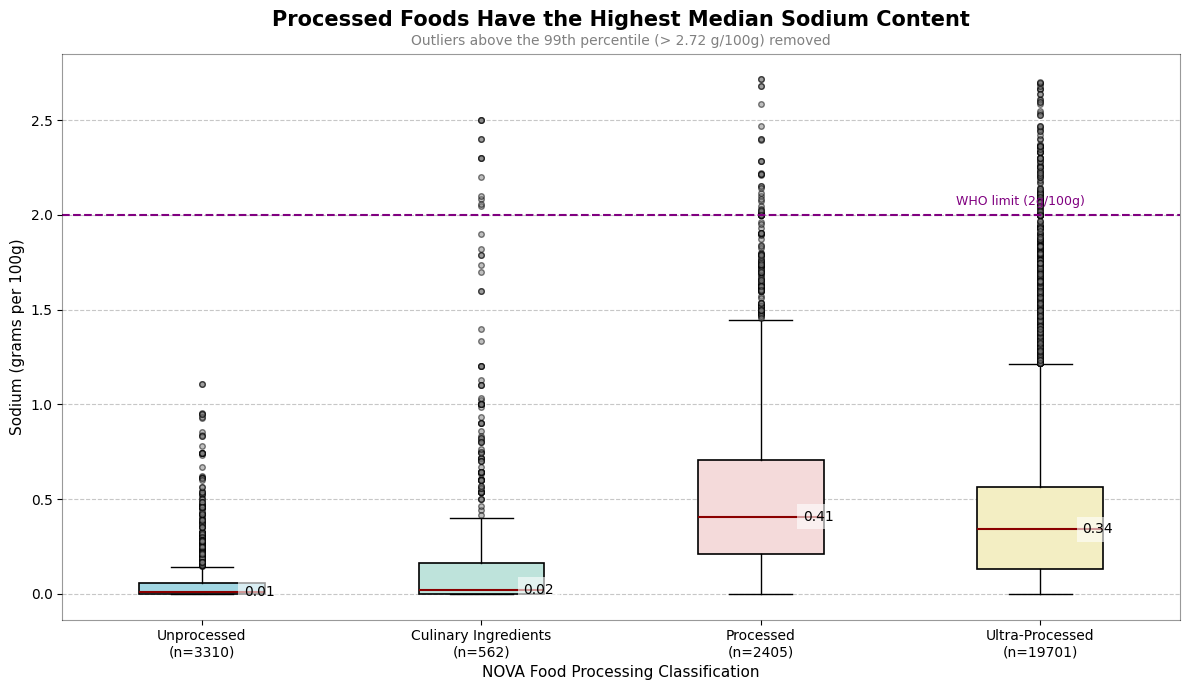

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data Transformations
# -----------------------------
# 1. Drop rows with missing values
df = df.dropna(subset=['FPro_class', 'Sodium'])

# 2. Convert FPro_class to int
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# 3. Remove outliers above 99th percentile
upper_bound = df['Sodium'].quantile(0.99)
df_filtered = df[df['Sodium'] <= upper_bound]

# -----------------------------
# Prepare Data for Plotting
# -----------------------------
# Label mapping for readability
label_map = {
    0: "Unprocessed",
    1: "Culinary Ingredients",
    2: "Processed",
    3: "Ultra-Processed"
}

classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sodium'] for cls in classes]
sample_sizes = [len(d) for d in data_to_plot]
x_labels = [f"{label_map[cls]}\n(n={size})" for cls, size in zip(classes, sample_sizes)]

# -----------------------------
# Create Figure and Axes
# -----------------------------
plt.figure(figsize=(12, 7))

# Boxplot styling
boxprops = dict(linewidth=1.2, edgecolor='black')
whiskerprops = dict(color='black', linewidth=1)
capprops = dict(color='black', linewidth=1)
medianprops = dict(color='darkred', linewidth=1.5)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5)

# Plot the boxplot
bp = plt.boxplot(
    data_to_plot,
    labels=x_labels,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops
)

# Set box fill colors
colors = ["#A1D6E2", "#BEE3DB", "#F4DADA", "#F3EEC3"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# -----------------------------
# Add Median Labels
# -----------------------------
medians = [np.median(d) for d in data_to_plot]
for i, med in enumerate(medians):
    plt.text(
        i + 1.15,
        med,
        f"{med:.2f}",
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )
plt.axhline(2, color='purple', linestyle='--', linewidth=1.5)
plt.text(3.7, 2.05, 'WHO limit (2g/100g)', color='purple', fontsize=9)

# -----------------------------
# Add Title, Subtitle, Labels
# -----------------------------
plt.title(
    "Processed Foods Have the Highest Median Sodium Content",
    fontsize=15,
    weight='bold',
    pad=20
)
plt.gca().text(
    0.5, 1.01,
    f"Outliers above the 99th percentile (> {upper_bound:.2f} g/100g) removed",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='gray',
    ha='center',
    va='bottom'
)
plt.xlabel("NOVA Food Processing Classification", fontsize=11)
plt.ylabel("Sodium (grams per 100g)", fontsize=11)


# -----------------------------
# Clean Up Style
# -----------------------------
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for spine in plt.gca().spines.values():
    spine.set_alpha(0.4)

plt.tight_layout()
plt.show()


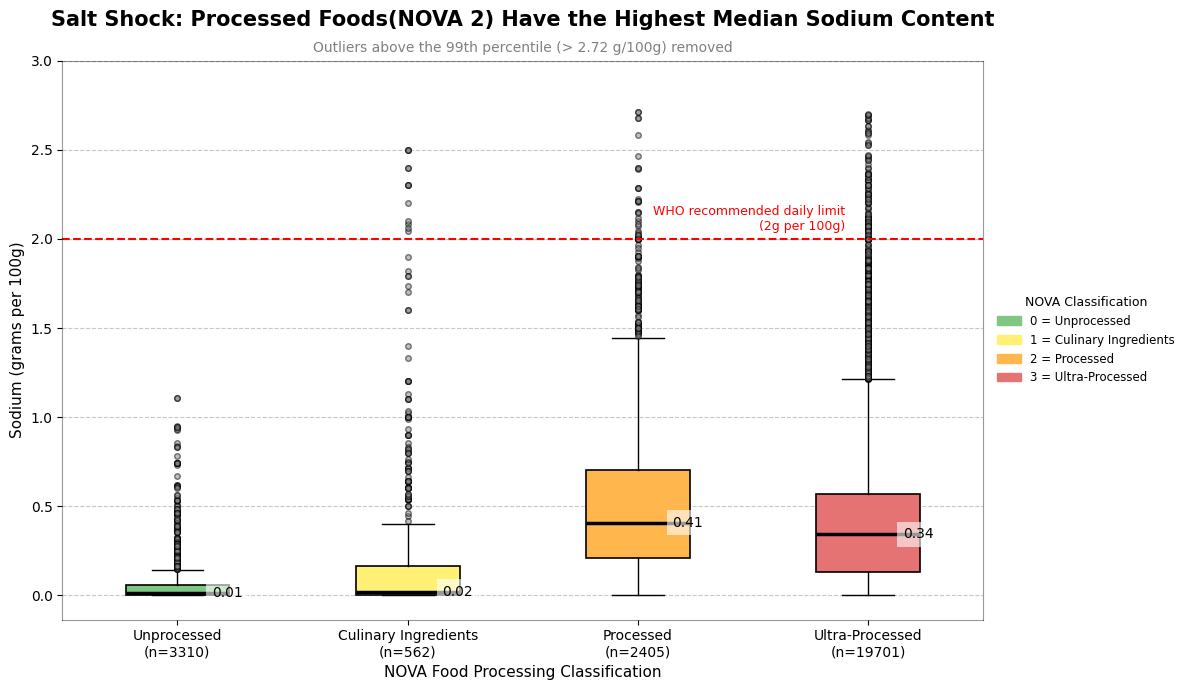

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data Transformations
# -----------------------------
# 1. Drop missing values
df = df.dropna(subset=['FPro_class', 'Sodium'])

# 2. Ensure FPro_class is integer
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# 3. Remove outliers above 99th percentile
upper_bound = df['Sodium'].quantile(0.99)
df_filtered = df[df['Sodium'] <= upper_bound]

# -----------------------------
# Prepare Data for Plotting
# -----------------------------
label_map = {
    0: "Unprocessed",
    1: "Culinary Ingredients",
    2: "Processed",
    3: "Ultra-Processed"
}

classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sodium'] for cls in classes]
sample_sizes = [len(d) for d in data_to_plot]
x_labels = [f"{label_map[cls]}\n(n={size})" for cls, size in zip(classes, sample_sizes)]
medians = [np.median(d) for d in data_to_plot]

# -----------------------------
# Create Figure
# -----------------------------
plt.figure(figsize=(12, 7))

# Style properties
boxprops = dict(linewidth=1.2, edgecolor='black')
whiskerprops = dict(color='black', linewidth=1)
capprops = dict(color='black', linewidth=1)
medianprops = dict(color='black', linewidth=2.5)  # Thicker median line
flierprops = dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5)

# Plot
bp = plt.boxplot(
    data_to_plot,
    labels=x_labels,
    patch_artist=True,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops
)
import matplotlib.patches as mpatches

# Define category descriptions and colors
nova_legend_labels = [
    "0 = Unprocessed",
    "1 = Culinary Ingredients",
    "2 = Processed",
    "3 = Ultra-Processed"
]
nova_colors = ["#81C784", "#FFF176", "#FFB74D", "#E57373"]

# Create matching color patches
nova_patches = [mpatches.Patch(color=c, label=l) for c, l in zip(nova_colors, nova_legend_labels)]

# Add legend to the right side of the plot
plt.legend(
    handles=nova_patches,
    title="NOVA Classification",
    title_fontsize=9,
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),  # Slightly outside the plot on the right
    fontsize=8.5,
    borderaxespad=0,
    frameon=False
)


# Set box fill colors based on NOVA level
palette = ["#81C784", "#FFF176", "#FFB74D", "#E57373"]  # Green to Red
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)

# -----------------------------
# Add Median Labels
# -----------------------------
for i, med in enumerate(medians):
    plt.text(
        i + 1.15,
        med,
        f"{med:.2f}",
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

# -----------------------------
# Title and Subtitle
# -----------------------------
plt.title(
    "Salt Shock: Processed Foods(NOVA 2) Have the Highest Median Sodium Content",
    fontsize=15,
    weight='bold',
    pad=25
)


plt.gca().text(
    0.5, 1.01,
    f"Outliers above the 99th percentile (> {upper_bound:.2f} g/100g) removed",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='gray',
    ha='center',
    va='bottom'
)

# -----------------------------
# WHO Guideline Line
# -----------------------------
plt.axhline(2, color='red', linestyle='--', linewidth=1.5)
plt.text(
    3.9, 2.05,
    "WHO recommended daily limit\n(2g per 100g)",
    color='red',
    fontsize=9,
    ha='right'
)

# -----------------------------
# Final Touches
# -----------------------------

plt.yticks(np.arange(0, 3.1, 0.5))  # From 0 to 3 in 0.5 steps

plt.xlabel("NOVA Food Processing Classification", fontsize=11)
plt.ylabel("Sodium (grams per 100g)", fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for spine in plt.gca().spines.values():
    spine.set_alpha(0.4)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Drop rows with missing values in 'FPro_class' or 'Sodium'
df = df.dropna(subset=['FPro_class', 'Sugars, total'])

# Ensure FPro_class is numeric and convert to integer
df['FPro_class'] = pd.to_numeric(df['FPro_class'], errors='coerce')
df = df.dropna(subset=['FPro_class'])
df['FPro_class'] = df['FPro_class'].astype(int)

# Filter out extreme sodium outliers (e.g., above the 99th percentile)
upper_bound = df['Sugars, total'].quantile(0.99)
df_filtered = df[df['Sugars, total'] <= upper_bound]

# Prepare data for the box plot by grouping sodium content by FPro_class
classes = sorted(df_filtered['FPro_class'].unique())
data_to_plot = [df_filtered[df_filtered['FPro_class'] == cls]['Sugars, total'] for cls in classes]

# Create the box plot
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, labels=[str(cls) for cls in classes], patch_artist=True)

# Color each box for clarity
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add title, axis labels, and grid
plt.title("Ultra-Processed Foods Contain Significantly More Sugar (Filtered)")
plt.xlabel("NOVA Food Processing Classification (FPro_class)")
plt.ylabel("Sugar (grams per 100g)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()